# 🎮 Phase 3: Gym 환경 실습

> **목표**: 실제 Decision Transformer 코드를 분석하고, Gym 환경에서 학습 및 추론 과정을 실습합니다.

---

## 🗺️ 이 Phase에서 배울 내용

```mermaid
flowchart LR
    subgraph Phase3["🎮 Phase 3: Gym 환경 실습"]
        direction LR
        subgraph S1["📂 데이터셋 탐색"]
            D1["궤적 데이터 구조"]
            D2["State / Action / Reward"]
            D3["RTG 계산"]
        end

        subgraph S2["🔍 모델 코드 분석"]
            M1["모델 아키텍처"]
            M2["임베딩 레이어"]
            M3["Forward Pass"]
        end

        subgraph S3["🚀 학습 & 추론"]
            T1["배치 생성"]
            T2["손실 함수 MSE"]
            T3["RTG 조건부 추론"]
        end

        S1 --> S2 --> S3
    end

    style S1 fill:#e3f2fd
    style S2 fill:#fff3e0
    style S3 fill:#e8f5e9
```

## 📋 목차

| 섹션 | 주제 | 학습 내용 |
|:---:|:---|:---|
| **1** | [환경 설정](#1-환경-설정) | Python 패키지 확인 및 경로 설정 |
| **2** | [데이터셋 탐색](#2-데이터셋-탐색) | D4RL 데이터셋 구조와 통계 분석 |
| **3** | [모델 코드 분석](#3-모델-코드-분석) | DecisionTransformer 내부 구조 이해 |
| **4** | [학습 실행](#4-학습-실행) | 배치 생성과 학습 루프 구현 |
| **5** | [평가 과정 이해](#5-평가-과정-이해) | RTG 조건부 추론 메커니즘 |

---

## 🔗 Phase 연결

```mermaid
flowchart LR
    P1["Phase 1\n📖 배경지식\nRL/Transformer\n기초 개념"] --> P2["Phase 2\n🧠 핵심개념\nRTG/시퀀스 구성\nDT의 작동 원리"]
    P2 --> P3["Phase 3\n🎮 Gym 실습\n실제 코드 실행\n학습 & 추론 실습"]
    P3 --> P4["Phase 4\n👾 Atari\n이미지 환경\n고급 응용"]

    style P3 fill:#ffeb3b,stroke:#f57f17,stroke-width:3px
    style P1 fill:#e3f2fd
    style P2 fill:#e8f5e9
    style P4 fill:#fce4ec
```

> 💡 **Gym 환경이란?**  
> OpenAI Gym은 강화학습 연구를 위한 표준 환경 라이브러리입니다.  
> **Hopper**, **HalfCheetah**, **Walker2d** 등 물리 시뮬레이션 기반 로봇 제어 태스크를 제공합니다.

---

## 📦 사전 요구사항

```python
# 필요한 패키지
- Python 3.7+
- PyTorch 1.8+
- NumPy
- Matplotlib
- transformers (Hugging Face)

# 선택적 (실제 환경 실행 시)
- MuJoCo
- d4rl
```

---
# 1. 환경 설정

## 🎯 목표
> Python 환경을 확인하고, Decision Transformer 코드에 접근할 수 있도록 경로를 설정합니다.

## 📦 필요한 패키지 구조

```mermaid
flowchart TB
    subgraph Project["📁 decision-transformer/"]
        direction TB
        subgraph Gym["📂 gym/ ← 이번 Phase에서 사용"]
            direction TB
            subgraph DT_Mod["decision_transformer/"]
                direction TB
                Models["models/\n├ decision_transformer.py ← 핵심 모델\n└ trajectory_gpt2.py ← GPT-2 기반"]
                Training["training/\n└ seq_trainer.py ← 학습 코드"]
                Eval["evaluation/\n└ evaluate_episodes.py ← 평가 코드"]
            end
            Data["data/\n└ hopper-medium-v2.pkl ← D4RL 데이터셋"]
            Exp["experiment.py ← 메인 실험 스크립트"]
        end
        Notebooks["doc/notebooks/ ← 현재 위치"]
    end

    style Gym fill:#e8f5e9,stroke:#4caf50,stroke-width:2px
    style DT_Mod fill:#fff3e0
    style Notebooks fill:#ffeb3b
```

## 🔧 패키지 역할

```mermaid
flowchart LR
    subgraph Packages["핵심 패키지"]
        direction TB
        PT["🔥 PyTorch\n모델 정의 & 학습"] --> TF["🤗 Transformers\nGPT-2 모델 사용"]
        NP["📊 NumPy\n데이터 전처리"] --> MPL["📈 Matplotlib\n시각화"]
    end

    subgraph Optional["선택 패키지"]
        MJ["🤖 MuJoCo\n물리 시뮬레이션"]
        D4["📦 D4RL\n데이터셋 다운로드"]
    end

    style Packages fill:#e3f2fd
    style Optional fill:#fce4ec
```

아래 셀에서 필요한 패키지가 설치되어 있는지 확인합니다.

In [7]:
# ============================================================
# 📦 패키지 버전 확인
# ============================================================
# Decision Transformer 실행에 필요한 핵심 패키지들입니다.
# 각 패키지의 역할:
#   - PyTorch: 딥러닝 프레임워크 (모델 정의 및 학습)
#   - NumPy: 수치 계산 (데이터 전처리)
#   - Transformers: Hugging Face의 GPT-2 모델 사용
# ============================================================

import sys
print(f"🐍 Python: {sys.version}")
print()

# PyTorch 확인
try:
    import torch
    print(f"✅ PyTorch: {torch.__version__}")
    print(f"   └─ CUDA available: {torch.cuda.is_available()}")
    if torch.cuda.is_available():
        print(f"   └─ CUDA device: {torch.cuda.get_device_name(0)}")
except ImportError:
    print("❌ PyTorch not installed!")
    print("   설치: pip install torch")

# NumPy 확인
try:
    import numpy as np
    print(f"✅ NumPy: {np.__version__}")
except ImportError:
    print("❌ NumPy not installed!")
    print("   설치: pip install numpy")

# Matplotlib 확인
try:
    import matplotlib
    print(f"✅ Matplotlib: {matplotlib.__version__}")
except ImportError:
    print("❌ Matplotlib not installed!")
    print("   설치: pip install matplotlib")

# Transformers 확인
try:
    import transformers
    print(f"✅ Transformers: {transformers.__version__}")
except ImportError:
    print("⚠️ Transformers not installed!")
    print("   설치: pip install transformers")
    print("   (없어도 SimpleDT로 실습 가능)")

print()
print("="*50)
print("모든 필수 패키지가 설치되었다면 다음 셀로 진행하세요!")

🐍 Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]

✅ PyTorch: 2.9.0+cpu
   └─ CUDA available: False
✅ NumPy: 2.0.2
✅ Matplotlib: 3.10.0
✅ Transformers: 5.0.0

모든 필수 패키지가 설치되었다면 다음 셀로 진행하세요!


In [8]:
# ============================================================
# 📂 프로젝트 경로 설정
# ============================================================
# Python이 gym/ 폴더의 모듈을 찾을 수 있도록 경로를 추가합니다.
#
# 환경 자동 감지:
#   - Google Colab: git clone 후 /content/decision-transformer 사용
#   - 로컬 환경: 노트북 위치에서 상대 경로로 자동 탐색
# ============================================================

import os
import sys

def find_project_root():
    """프로젝트 루트를 자동으로 탐색합니다."""

    # 1) Colab 환경 감지
    if 'google.colab' in sys.modules:
        colab_path = '/content/decision-transformer'
        if not os.path.exists(colab_path):
            print("📥 Colab 환경 감지! 레포를 클론합니다...")
            os.system('git clone https://github.com/ggeutzzang/decision-transformer.git /content/decision-transformer')
        return colab_path

    # 2) 로컬 환경: 현재 디렉토리에서 상위로 올라가며 탐색
    #    'gym/' 과 'atari/' 폴더가 모두 있는 디렉토리를 프로젝트 루트로 판단
    search_dir = os.path.abspath(os.getcwd())
    for _ in range(5):  # 최대 5단계 상위까지 탐색
        if os.path.isdir(os.path.join(search_dir, 'gym')) and \
           os.path.isdir(os.path.join(search_dir, 'atari')):
            return search_dir
        search_dir = os.path.dirname(search_dir)

    # 3) 못 찾으면 기본값
    return os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

PROJECT_ROOT = find_project_root()
GYM_PATH = os.path.join(PROJECT_ROOT, 'gym')

# sys.path에 경로 추가 (중복 방지)
# 이렇게 하면 `from decision_transformer.models import ...` 가 가능해짐
if GYM_PATH not in sys.path:
    sys.path.insert(0, GYM_PATH)

print("📂 경로 설정 결과:")
print(f"   Project root: {PROJECT_ROOT}")
print(f"   Gym path:     {GYM_PATH}")
print()

# 경로 검증
if os.path.exists(GYM_PATH):
    print("✅ Gym 경로 존재 확인!")
    dt_path = os.path.join(GYM_PATH, 'decision_transformer')
    if os.path.exists(dt_path):
        print("✅ decision_transformer 모듈 존재 확인!")
    else:
        print("⚠️ decision_transformer 모듈을 찾을 수 없습니다.")
else:
    print("❌ Gym 경로가 존재하지 않습니다!")
    print("   노트북 위치를 확인하세요.")

📂 경로 설정 결과:
   Project root: /content/decision-transformer
   Gym path:     /content/decision-transformer/gym

✅ Gym 경로 존재 확인!
✅ decision_transformer 모듈 존재 확인!


---
# 2. 데이터셋 탐색

## 🎯 목표
> D4RL 데이터셋의 구조를 이해하고, 강화학습 궤적(trajectory) 데이터가 어떻게 구성되어 있는지 파악합니다.

## 📚 D4RL이란?

**D4RL** (Datasets for Deep Data-Driven Reinforcement Learning)은 오프라인 강화학습 연구를 위한 표준 데이터셋입니다.

```mermaid
flowchart TB
    subgraph D4RL["📦 D4RL 데이터셋"]
        direction LR
        subgraph Envs["🏋️ 환경"]
            E1["hopper"]
            E2["halfcheetah"]
            E3["walker2d"]
        end

        subgraph Quality["📊 데이터 품질"]
            Q1["medium\n중간 수준 정책"]
            Q2["medium-replay\n학습 중 replay buffer"]
            Q3["medium-expert\nmedium + expert 혼합"]
            Q4["expert\n전문가 정책"]
        end

        Envs --> Quality
    end

    subgraph Naming["📝 파일명 규칙"]
        direction LR
        N1["hopper"] --- N2["-"] --- N3["medium"] --- N4["-v2"] --- N5[".pkl"]
        N1b["환경"] ~~~ N3b["데이터셋 종류"] ~~~ N4b["버전"]
    end

    style D4RL fill:#e3f2fd
    style Envs fill:#fff3e0
    style Quality fill:#e8f5e9
    style Naming fill:#f3e5f5
```

## 🦿 Hopper 환경

이번 실습에서 사용할 **Hopper**는 한 다리로 뛰는 로봇입니다.

```mermaid
flowchart TB
    subgraph Hopper["🦿 Hopper 로봇"]
        direction TB
        Torso["● 몸통 torso"] --> Thigh["│ 허벅지 thigh"]
        Thigh --> Leg["│ 정강이 leg"]
        Leg --> Foot["── 발 foot"]
    end

    subgraph Specs["📋 환경 스펙"]
        direction TB
        SP1["State 차원: 11\n위치, 속도, 각도 등"]
        SP2["Action 차원: 3\n각 관절의 토크"]
        SP3["목표: 최대한 멀리 뛰기\n넘어지지 않고 전진"]
    end

    Hopper --- Specs

    style Hopper fill:#fff3e0
    style Specs fill:#e8f5e9
```

## 📊 궤적(Trajectory) 데이터 구조

D4RL 데이터셋은 여러 개의 **궤적(trajectory)**으로 구성됩니다.  
각 궤적은 에이전트가 환경에서 한 에피소드 동안 경험한 데이터를 담고 있습니다.

```mermaid
flowchart LR
    subgraph Dataset["📂 trajectories 리스트"]
        direction TB
        T1["traj_0"] 
        T2["traj_1"]
        TN["traj_N"]
        T1 ~~~ T2 ~~~ TN
    end

    subgraph OneTraj["📋 각 trajectory 구조"]
        direction TB
        OBS["observations: (T, 11)\ns₀, s₁, ..., s_T"]
        ACT["actions: (T, 3)\na₀, a₁, ..., a_T"]
        REW["rewards: (T,)\nr₀, r₁, ..., r_T"]
    end

    Dataset --> OneTraj

    style Dataset fill:#e3f2fd
    style OBS fill:#c8e6c9
    style ACT fill:#bbdefb
    style REW fill:#ffcdd2
```

> 💡 **T는 에피소드 길이**로, 궤적마다 다를 수 있습니다.  
> Hopper의 경우 보통 100~1000 스텝 정도입니다.

In [9]:
# ============================================================
# 📂 데이터셋 파일 확인
# ============================================================
# D4RL 데이터셋은 pickle 형식으로 저장되어 있습니다.
# 각 파일에는 여러 개의 에피소드(궤적)가 담겨 있습니다.
# ============================================================

import pickle
import numpy as np

# 데이터 디렉토리 경로
data_dir = os.path.join(GYM_PATH, 'data')

print("📂 데이터셋 디렉토리 탐색")
print("="*60)

if os.path.exists(data_dir):
    files = os.listdir(data_dir)
    pkl_files = [f for f in files if f.endswith('.pkl')]
    
    if pkl_files:
        print(f"\n✅ 사용 가능한 데이터셋 ({len(pkl_files)}개):\n")
        print(f"{'파일명':<35} {'크기':>10}")
        print("-"*50)
        for f in sorted(pkl_files):
            size = os.path.getsize(os.path.join(data_dir, f)) / (1024*1024)
            print(f"  {f:<33} {size:>8.1f} MB")
    else:
        print("\n⚠️ .pkl 파일이 없습니다.")
        print("\n데이터셋 다운로드 방법:")
        print("  cd gym")
        print("  python data/download_d4rl_datasets.py")
else:
    print(f"❌ 데이터 디렉토리가 없습니다: {data_dir}")
    print("\n데이터셋을 먼저 다운로드하세요:")
    print("  cd gym && python data/download_d4rl_datasets.py")

📂 데이터셋 디렉토리 탐색

⚠️ .pkl 파일이 없습니다.

데이터셋 다운로드 방법:
  cd gym
  python data/download_d4rl_datasets.py


In [10]:
# ============================================================
# 📥 데이터셋 로드
# ============================================================
# hopper-medium-v2 데이터셋을 로드합니다.
# 파일이 없으면 더미 데이터를 생성합니다.
#
# 데이터 구조:
#   trajectories = [traj_1, traj_2, ..., traj_N]
#   각 traj는 하나의 에피소드(게임 한 판)를 의미
# ============================================================

dataset_path = os.path.join(data_dir, 'hopper-medium-v2.pkl')

print("📥 데이터셋 로드 중...")
print("="*60)

if os.path.exists(dataset_path):
    # 실제 데이터셋 로드
    with open(dataset_path, 'rb') as f:
        trajectories = pickle.load(f)
    
    print(f"✅ 데이터셋 로드 완료!")
    print(f"\n📊 기본 정보:")
    print(f"   총 궤적(에피소드) 수: {len(trajectories)}")
    print(f"   첫 번째 궤적의 키: {list(trajectories[0].keys())}")
    
    DATA_SOURCE = "D4RL"
else:
    # 더미 데이터 생성
    print(f"⚠️ 파일이 없습니다: {dataset_path}")
    print("\n🔧 더미 데이터를 생성합니다...")
    print("   (실제 데이터와 동일한 구조로 생성)")
    
    np.random.seed(42)  # 재현성을 위한 시드
    trajectories = []
    
    for i in range(100):  # 100개의 에피소드
        ep_len = np.random.randint(100, 500)  # 에피소드 길이
        traj = {
            'observations': np.random.randn(ep_len, 11).astype(np.float32),  # 11차원 상태
            'actions': np.clip(np.random.randn(ep_len, 3), -1, 1).astype(np.float32),  # 3차원 행동
            'rewards': np.random.uniform(0, 3, ep_len).astype(np.float32)  # 보상
        }
        trajectories.append(traj)
    
    print(f"✅ 더미 궤적 {len(trajectories)}개 생성 완료!")
    DATA_SOURCE = "Dummy"

print(f"\n📌 데이터 출처: {DATA_SOURCE}")

📥 데이터셋 로드 중...
⚠️ 파일이 없습니다: /content/decision-transformer/gym/data/hopper-medium-v2.pkl

🔧 더미 데이터를 생성합니다...
   (실제 데이터와 동일한 구조로 생성)
✅ 더미 궤적 100개 생성 완료!

📌 데이터 출처: Dummy


In [11]:
# ============================================================
# 🔍 궤적 데이터 상세 분석
# ============================================================
# 하나의 궤적(trajectory)이 어떻게 구성되어 있는지 살펴봅니다.
#
# 궤적 구조:
# ┌─────────────────────────────────────────────────────────┐
# │  traj = {                                               │
# │    'observations': [s_0, s_1, s_2, ..., s_T]           │
# │    'actions':      [a_0, a_1, a_2, ..., a_T]           │
# │    'rewards':      [r_0, r_1, r_2, ..., r_T]           │
# │  }                                                     │
# │                                                        │
# │  T = 에피소드 길이 (환경마다 다름)                        │
# └─────────────────────────────────────────────────────────┘
# ============================================================

# 첫 번째 궤적 선택
traj = trajectories[0]

print("🔍 첫 번째 궤적 상세 분석")
print("="*60)

# Shape 정보
print("\n📐 Shape 정보:")
print(f"   observations: {traj['observations'].shape}")
print(f"                 └─ (에피소드 길이, state 차원)")
print(f"   actions:      {traj['actions'].shape}")
print(f"                 └─ (에피소드 길이, action 차원)")
print(f"   rewards:      {traj['rewards'].shape}")
print(f"                 └─ (에피소드 길이,)")

# 에피소드 통계
ep_len = len(traj['rewards'])
total_return = sum(traj['rewards'])

print(f"\n📊 에피소드 통계:")
print(f"   에피소드 길이: {ep_len} 스텝")
print(f"   총 Return: {total_return:.2f}")
print(f"   평균 Reward: {total_return / ep_len:.4f}")

# 실제 데이터 샘플
print(f"\n📝 데이터 샘플 (처음 3 스텝):")
print()
print("   Timestep 0:")
print(f"     State:  {traj['observations'][0][:5]}... (앞 5개만 표시)")
print(f"     Action: {traj['actions'][0]}")
print(f"     Reward: {traj['rewards'][0]:.4f}")
print()
print("   Timestep 1:")
print(f"     State:  {traj['observations'][1][:5]}...")
print(f"     Action: {traj['actions'][1]}")
print(f"     Reward: {traj['rewards'][1]:.4f}")
print()
print("   Timestep 2:")
print(f"     State:  {traj['observations'][2][:5]}...")
print(f"     Action: {traj['actions'][2]}")
print(f"     Reward: {traj['rewards'][2]:.4f}")

🔍 첫 번째 궤적 상세 분석

📐 Shape 정보:
   observations: (202, 11)
                 └─ (에피소드 길이, state 차원)
   actions:      (202, 3)
                 └─ (에피소드 길이, action 차원)
   rewards:      (202,)
                 └─ (에피소드 길이,)

📊 에피소드 통계:
   에피소드 길이: 202 스텝
   총 Return: 317.95
   평균 Reward: 1.5740

📝 데이터 샘플 (처음 3 스텝):

   Timestep 0:
     State:  [-0.5502345   0.5154331   0.47386083  1.3684502  -0.91682684]... (앞 5개만 표시)
     Action: [0.5623166  0.41726345 1.        ]
     Reward: 2.8213

   Timestep 1:
     State:  [-0.1595165   0.02222183 -0.4277929  -0.53181744 -0.1174755 ]...
     Action: [ 0.349595   -0.54914695  1.        ]
     Reward: 0.0475

   Timestep 2:
     State:  [-0.5251228  1.9127712 -2.0267196  1.1194236  0.7791926]...
     Action: [1.         0.23320596 0.06032192]
     Reward: 1.5683


In [ ]:
# ============================================================
# 🐼 Pandas로 데이터셋 분석
# ============================================================
# 궤적 데이터를 DataFrame으로 변환하면 훨씬 직관적으로 파악할 수 있습니다.
# - 각 상태 차원의 분포를 한눈에 확인
# - action과 reward의 상관관계 파악
# - 이상치(outlier) 탐지
# ============================================================

import pandas as pd

# ── 하나의 궤적을 DataFrame으로 변환 ──
traj = trajectories[0]

# Hopper 상태 차원 이름
state_cols = [
    'z_pos', 'y_angle', 'thigh_angle', 'leg_angle', 'foot_angle',
    'z_vel', 'y_ang_vel', 'thigh_vel', 'leg_vel', 'foot_vel', 'x_vel'
]
action_cols = ['act_thigh', 'act_leg', 'act_foot']

# 상태 + 행동 + 보상을 하나의 DataFrame으로
df = pd.DataFrame(traj['observations'], columns=state_cols)
df[action_cols] = traj['actions']
df['reward'] = traj['rewards']
df.index.name = 'timestep'

print("🐼 궤적 #0을 DataFrame으로 변환")
print("="*60)
print(f"Shape: {df.shape} (행=타임스텝, 열=state+action+reward)")
print()
df.head(10)


In [ ]:
# ============================================================
# 📊 기술 통계 (describe)
# ============================================================
# 각 차원의 평균, 표준편차, 최소/최대값을 한눈에 확인합니다.
# 스케일이 차원마다 크게 다른 것을 확인할 수 있습니다.
# → 이것이 상태 정규화가 필요한 이유입니다!
# ============================================================

print("📊 기술 통계 (궤적 #0)")
print("="*60)
df.describe().round(3)


In [ ]:
# ============================================================
# 🔗 전체 데이터셋 요약 (모든 궤적 합산)
# ============================================================
# 개별 궤적이 아닌 전체 데이터셋 수준의 통계를 확인합니다.
# ============================================================

# 에피소드 수준 요약 DataFrame
episode_df = pd.DataFrame({
    'length': [len(t['rewards']) for t in trajectories],
    'return': [t['rewards'].sum() for t in trajectories],
    'mean_reward': [t['rewards'].mean() for t in trajectories],
    'std_reward': [t['rewards'].std() for t in trajectories],
    'max_reward': [t['rewards'].max() for t in trajectories],
    'min_reward': [t['rewards'].min() for t in trajectories],
})
episode_df.index.name = 'episode'

print("🔗 전체 데이터셋 에피소드 요약")
print("="*60)
print(f"총 에피소드 수: {len(episode_df)}")
print(f"총 타임스텝 수: {episode_df['length'].sum():,}")
print()
episode_df.describe().round(2)


In [ ]:
# ============================================================
# 📈 상관관계 분석
# ============================================================
# action과 state/reward 간의 상관관계를 확인합니다.
# 어떤 상태 변수가 행동 선택에 영향을 미치는지 파악할 수 있습니다.
# ============================================================

import matplotlib.pyplot as plt

# 전체 궤적을 합쳐서 상관관계 계산
all_data = []
for t in trajectories[:50]:  # 처음 50개 궤적 사용 (속도)
    tdf = pd.DataFrame(t['observations'], columns=state_cols)
    tdf[action_cols] = t['actions']
    tdf['reward'] = t['rewards']
    all_data.append(tdf)

full_df = pd.concat(all_data, ignore_index=True)

print(f"📈 상관관계 분석 (궤적 50개, {len(full_df):,} 타임스텝)")
print("="*60)

# 상관관계 히트맵
fig, ax = plt.subplots(figsize=(12, 9))
corr = full_df.corr()
im = ax.imshow(corr, cmap='RdBu_r', vmin=-1, vmax=1, aspect='auto')

# 축 레이블
labels = list(full_df.columns)
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
ax.set_yticklabels(labels, fontsize=9)
ax.set_title('State / Action / Reward Correlation', fontsize=14)
plt.colorbar(im, ax=ax, label='Correlation', shrink=0.8)

# 상관계수 텍스트 표시 (주요 값만)
for i in range(len(labels)):
    for j in range(len(labels)):
        val = corr.iloc[i, j]
        if abs(val) > 0.3 and i != j:
            ax.text(j, i, f'{val:.2f}', ha='center', va='center', fontsize=7,
                    color='white' if abs(val) > 0.6 else 'black')

plt.tight_layout()
plt.show()

# reward와 가장 상관이 높은 변수 top 5
print("\n🏆 reward와 상관관계가 높은 변수 (절대값 기준):")
reward_corr = corr['reward'].drop('reward').abs().sort_values(ascending=False)
for name, val in reward_corr.head(5).items():
    direction = '양(+)' if corr.loc[name, 'reward'] > 0 else '음(-)'
    print(f"   {name:<15} : {corr.loc[name, 'reward']:>+.3f} ({direction} 상관)")


📊 데이터셋 통계 시각화


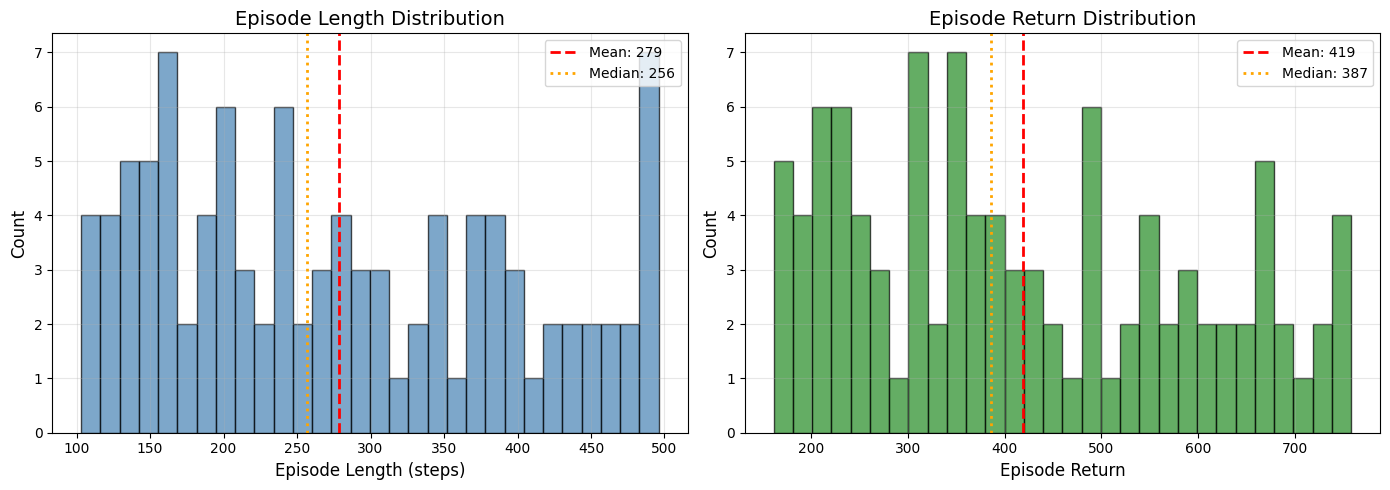


📈 수치 통계:
┌──────────────────────────────────────────────────┐
│ 항목                                           값 │
├──────────────────────────────────────────────────┤
│ 총 에피소드 수                                   100 │
│ 평균 에피소드 길이                            278.6 ± 117.9 │
│ 최소/최대 길이                     103 / 496         │
│ 평균 Return                             419.1 ± 174.7 │
│ 최소/최대 Return               161.4 / 758.0       │
└──────────────────────────────────────────────────┘

💡 팁: 학습 시 목표 Return을 평균(419) 이상으로 설정하면
       더 나은 정책을 유도할 수 있습니다!


In [12]:
# ============================================================
# 📊 데이터셋 전체 통계 시각화
# ============================================================
# 전체 데이터셋의 분포를 시각화하여 데이터 특성을 파악합니다.
# - 에피소드 길이 분포: 에피소드가 얼마나 길게 지속되는가?
# - Return 분포: 정책의 품질이 어떠한가?
# ============================================================

import matplotlib.pyplot as plt

# 한글 폰트 설정 (utils.py에서 가져옴)
try:
    from utils import setup_matplotlib
except:
    plt.rcParams['axes.unicode_minus'] = False

# 통계 계산
lengths = [len(t['rewards']) for t in trajectories]
returns = [sum(t['rewards']) for t in trajectories]

print("📊 데이터셋 통계 시각화")
print("="*60)

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 에피소드 길이 분포
ax1 = axes[0]
ax1.hist(lengths, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(np.mean(lengths), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {np.mean(lengths):.0f}')
ax1.axvline(np.median(lengths), color='orange', linestyle=':', linewidth=2,
            label=f'Median: {np.median(lengths):.0f}')
ax1.set_xlabel('Episode Length (steps)', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_title('Episode Length Distribution', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Return 분포
ax2 = axes[1]
ax2.hist(returns, bins=30, edgecolor='black', alpha=0.7, color='forestgreen')
ax2.axvline(np.mean(returns), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {np.mean(returns):.0f}')
ax2.axvline(np.median(returns), color='orange', linestyle=':', linewidth=2,
            label=f'Median: {np.median(returns):.0f}')
ax2.set_xlabel('Episode Return', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_title('Episode Return Distribution', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 수치 통계 출력
print(f"\n📈 수치 통계:")
print(f"┌{'─'*50}┐")
print(f"│ {'항목':<20} {'값':>25} │")
print(f"├{'─'*50}┤")
print(f"│ {'총 에피소드 수':<20} {len(trajectories):>25,} │")
print(f"│ {'평균 에피소드 길이':<20} {np.mean(lengths):>22.1f} ± {np.std(lengths):.1f} │")
print(f"│ {'최소/최대 길이':<20} {min(lengths):>11} / {max(lengths):<11} │")
print(f"│ {'평균 Return':<20} {np.mean(returns):>22.1f} ± {np.std(returns):.1f} │")
print(f"│ {'최소/최대 Return':<20} {min(returns):>11.1f} / {max(returns):<11.1f} │")
print(f"└{'─'*50}┘")

# Decision Transformer에서 사용할 목표 Return 참고
print(f"\n💡 팁: 학습 시 목표 Return을 평균({np.mean(returns):.0f}) 이상으로 설정하면")
print(f"       더 나은 정책을 유도할 수 있습니다!")

## 📈 RTG (Return-to-Go) 계산 실습

> **RTG**는 Decision Transformer의 핵심 개념입니다.  
> "현재 시점부터 에피소드 끝까지 얻을 수 있는 총 보상"을 의미합니다.

### RTG 계산 공식

$$\text{RTG}_t = r_t + r_{t+1} + r_{t+2} + \cdots + r_T$$

```mermaid
flowchart LR
    subgraph Example["📝 RTG 계산 예시: rewards = 1, 2, 3, 4, 5"]
        direction TB
        subgraph T0["t=0"]
            R0["남은 보상: 1+2+3+4+5\nRTG = 15"]
        end
        subgraph T1["t=1"]
            R1["남은 보상: 2+3+4+5\nRTG = 14"]
        end
        subgraph T2["t=2"]
            R2["남은 보상: 3+4+5\nRTG = 12"]
        end
        subgraph T3["t=3"]
            R3["남은 보상: 4+5\nRTG = 9"]
        end
        subgraph T4["t=4"]
            R4["남은 보상: 5\nRTG = 5"]
        end
        T0 --> T1 --> T2 --> T3 --> T4
    end

    style T0 fill:#ffcdd2
    style T1 fill:#ffccbc
    style T2 fill:#fff9c4
    style T3 fill:#dcedc8
    style T4 fill:#c8e6c9
```

### 할인율(γ)을 적용한 RTG

실제로는 **할인율(discount factor, γ)**을 적용하기도 합니다:

$$\text{RTG}_t = r_t + \gamma \cdot r_{t+1} + \gamma^2 \cdot r_{t+2} + \cdots$$

```mermaid
flowchart LR
    subgraph Gamma["⚙️ 할인율에 따른 차이"]
        direction TB
        G1["γ = 1.0\n모든 미래 보상을 동등하게\n→ Decision Transformer 논문에서 사용"]
        G2["γ = 0.99\n먼 미래 보상을 약간 할인"]
        G3["γ = 0.9\n먼 미래 보상을 많이 할인"]
    end

    style G1 fill:#c8e6c9,stroke:#2e7d32,stroke-width:2px
    style G2 fill:#fff9c4
    style G3 fill:#ffcdd2
```

### 🧮 RTG 역순 계산 알고리즘

RTG는 **뒤에서 앞으로(역순)** 계산하면 효율적입니다:

```mermaid
flowchart RL
    subgraph Algorithm["🔄 역순 계산"]
        direction RL
        S4["t=4: RTG=r₄=5"] --> S3["t=3: RTG=r₃+γ·5=9"]
        S3 --> S2["t=2: RTG=r₂+γ·9=12"]
        S2 --> S1["t=1: RTG=r₁+γ·12=14"]
        S1 --> S0["t=0: RTG=r₀+γ·14=15"]
    end

    style Algorithm fill:#e3f2fd
    style S0 fill:#c8e6c9,stroke:#2e7d32,stroke-width:2px
```

> 💡 **Decision Transformer 논문에서는 γ=1.0 (할인 없음)을 사용합니다.**  
> 이는 모든 미래 보상을 동등하게 취급하겠다는 의미입니다.

In [ ]:
# ============================================================
# 🔢 RTG 계산 함수 구현
# ============================================================
# experiment.py에서 사용하는 discount_cumsum 함수를 구현합니다.
# 
# 알고리즘:
#   1. 마지막 시점의 RTG = 마지막 reward
#   2. 역순으로 진행하며 RTG[t] = reward[t] + γ * RTG[t+1]
# ============================================================

def discount_cumsum(x, gamma=1.0):
    """
    할인된 누적합(RTG) 계산
    
    Parameters:
    -----------
    x : numpy.ndarray
        reward 시퀀스 [r_0, r_1, ..., r_T]
    gamma : float
        할인율 (default: 1.0, 즉 할인 없음)
    
    Returns:
    --------
    numpy.ndarray
        RTG 시퀀스 [RTG_0, RTG_1, ..., RTG_T]
    
    예시:
    -----
    >>> rewards = [1, 2, 3]
    >>> discount_cumsum(rewards, gamma=1.0)
    array([6, 5, 3])  # [1+2+3, 2+3, 3]
    """
    # 결과 배열 초기화
    discount_cumsum_arr = np.zeros_like(x)
    
    # 마지막 시점: RTG[-1] = reward[-1]
    discount_cumsum_arr[-1] = x[-1]
    
    # 역순으로 계산: RTG[t] = reward[t] + γ * RTG[t+1]
    for t in reversed(range(x.shape[0] - 1)):
        discount_cumsum_arr[t] = x[t] + gamma * discount_cumsum_arr[t + 1]
    
    return discount_cumsum_arr

# ============================================================
# 📝 RTG 계산 예시
# ============================================================
print("🔢 RTG 계산 예시")
print("="*60)

# 간단한 예시
rewards = np.array([1.0, 2.0, 3.0, 4.0, 5.0])

# 할인율에 따른 RTG 비교
rtg_gamma1 = discount_cumsum(rewards, gamma=1.0)
rtg_gamma099 = discount_cumsum(rewards, gamma=0.99)
rtg_gamma09 = discount_cumsum(rewards, gamma=0.9)

print(f"\nRewards: {rewards}")
print()
print(f"{'시점 t':<8} {'γ=1.0':>10} {'γ=0.99':>12} {'γ=0.9':>12}")
print("-"*45)
for t in range(len(rewards)):
    print(f"  {t:<6} {rtg_gamma1[t]:>10.2f} {rtg_gamma099[t]:>12.2f} {rtg_gamma09[t]:>12.2f}")

print()
print("💡 γ=1.0: 모든 미래 보상을 동등하게 합산")
print("   γ<1.0: 먼 미래 보상일수록 더 적게 반영")

In [ ]:
# ============================================================
# 📈 실제 궤적에서 RTG 시각화
# ============================================================
# 실제 데이터에서 Reward와 RTG가 어떻게 변화하는지 시각화합니다.
#
# 관찰 포인트:
#   - Reward: 순간적인 보상 (노이즈가 많음)
#   - RTG: 미래 보상의 합 (시간이 지날수록 감소)
# ============================================================

# 첫 번째 궤적의 데이터
traj = trajectories[0]
rewards_traj = traj['rewards']
rtg = discount_cumsum(rewards_traj, gamma=1.0)

print("📈 실제 궤적에서 Reward vs RTG")
print("="*60)

# 그래프 (처음 100 스텝만)
num_steps = min(100, len(rewards_traj))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Reward over time
ax1 = axes[0]
ax1.plot(rewards_traj[:num_steps], alpha=0.8, linewidth=1.5, color='blue')
ax1.fill_between(range(num_steps), rewards_traj[:num_steps], alpha=0.3, color='blue')
ax1.axhline(y=np.mean(rewards_traj[:num_steps]), color='red', linestyle='--', 
            label=f'Mean: {np.mean(rewards_traj[:num_steps]):.2f}')
ax1.set_xlabel('Timestep', fontsize=12)
ax1.set_ylabel('Reward', fontsize=12)
ax1.set_title('Instantaneous Reward Over Time', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. RTG over time
ax2 = axes[1]
ax2.plot(rtg[:num_steps], alpha=0.8, linewidth=2, color='orange')
ax2.fill_between(range(num_steps), rtg[:num_steps], alpha=0.3, color='orange')
ax2.set_xlabel('Timestep', fontsize=12)
ax2.set_ylabel('Return-to-Go', fontsize=12)
ax2.set_title('Return-to-Go Over Time', fontsize=14)
ax2.grid(True, alpha=0.3)

# RTG 감소 추세 표시
ax2.annotate(f'시작: {rtg[0]:.0f}', xy=(0, rtg[0]), fontsize=10,
             xytext=(10, rtg[0] - (rtg[0] - rtg[num_steps-1])*0.2),
             arrowprops=dict(arrowstyle='->', color='gray'))
ax2.annotate(f't={num_steps-1}: {rtg[num_steps-1]:.0f}', 
             xy=(num_steps-1, rtg[num_steps-1]), fontsize=10,
             xytext=(num_steps-20, rtg[num_steps-1] + (rtg[0] - rtg[num_steps-1])*0.2),
             arrowprops=dict(arrowstyle='->', color='gray'))

plt.tight_layout()
plt.show()

# 핵심 포인트 출력
print(f"\n📌 핵심 관찰:")
print(f"   • 초기 RTG (t=0): {rtg[0]:.2f}")
print(f"     └─ 에피소드 전체에서 얻을 총 보상")
print(f"   • 중간 RTG (t={num_steps//2}): {rtg[num_steps//2]:.2f}")
print(f"     └─ 남은 절반 동안 얻을 보상")
print(f"   • 최종 RTG (t={num_steps-1}): {rtg[num_steps-1]:.2f}")
print(f"     └─ 거의 에피소드 끝, 남은 보상 적음")
print()
print("💡 RTG는 시간이 지날수록 단조 감소합니다!")
print("   (매 스텝 reward를 받으면서 '남은 보상'이 줄어들기 때문)")

---
# 3. 모델 코드 분석

## 🎯 목표
> Decision Transformer 모델의 내부 구조를 이해하고, 각 컴포넌트의 역할을 파악합니다.

## 🏗️ DecisionTransformer 전체 아키텍처

```mermaid
flowchart TB
    subgraph Inputs["📥 입력"]
        RTG["RTG\n(batch, K, 1)"]
        State["State\n(batch, K, 11)"]
        Action["Action\n(batch, K, 3)"]
        Time["Timestep\n(batch, K)"]
    end

    subgraph Embedding["1️⃣ 임베딩 레이어"]
        RTG -->|"Linear(1→128)"| RE["RTG Emb"]
        State -->|"Linear(11→128)"| SE["State Emb"]
        Action -->|"Linear(3→128)"| AE["Action Emb"]
        Time -->|"Embedding(1000, 128)"| TE["Time Emb"]

        RE --- |"+ Time"| REF["R + T"]
        SE --- |"+ Time"| SEF["S + T"]
        AE --- |"+ Time"| AEF["A + T"]
    end

    subgraph Interleave["2️⃣ 시퀀스 구성 (Interleave)"]
        REF --> Stack
        SEF --> Stack
        AEF --> Stack
        Stack["[R₀, s₀, a₀, R₁, s₁, a₁, ...]\nShape: (batch, K×3, 128)"] --> LN["LayerNorm"]
    end

    subgraph Transformer["3️⃣ GPT-2 Transformer"]
        LN --> L1["Layer 1: Attention → FFN → LN"]
        L1 --> L2["Layer 2: Attention → FFN → LN"]
        L2 --> L3["Layer 3: Attention → FFN → LN"]
        L3 --> Out["(batch, K×3, 128)"]
    end

    subgraph Heads["4️⃣ 예측 헤드"]
        Out -->|"[:, 1::3, :]\nstate 위치"| PA["⭐ predict_action\nLinear(128→3)"]
        Out -->|"[:, 2::3, :]"| PS["predict_state\n(미사용)"]
        Out -->|"[:, 2::3, :]"| PR["predict_return\n(미사용)"]
    end

    style Inputs fill:#e1f5fe
    style Embedding fill:#fff3e0
    style Interleave fill:#f3e5f5
    style Transformer fill:#e8f5e9
    style Heads fill:#ffebee
    style PA fill:#c8e6c9,stroke:#2e7d32,stroke-width:3px
    style PS fill:#eeeeee,stroke:#bdbdbd,stroke-dasharray: 5 5
    style PR fill:#eeeeee,stroke:#bdbdbd,stroke-dasharray: 5 5
```

## 🔑 핵심 아이디어: 시퀀스 구성 (Interleaving)

Decision Transformer의 가장 독특한 설계는 **세 종류의 토큰을 인터리빙**하는 것입니다:

```mermaid
flowchart LR
    subgraph Sequence["📝 토큰 시퀀스 구성"]
        direction LR
        R0["R̂₀"] --> S0["s₀"] --> A0["a₀"]
        A0 --> R1["R̂₁"] --> S1["s₁"] --> A1["a₁"]
        A1 --> R2["R̂₂"] --> S2["s₂"] --> A2["a₂"]
    end

    subgraph Predict["🎯 예측 방향"]
        direction TB
        P1["State 토큰 위치에서\nAction을 예측"]
        P2["즉, s₂ 위치의 출력으로\na₂를 예측"]
    end

    Sequence --> Predict

    style R0 fill:#ffcdd2
    style R1 fill:#ffcdd2
    style R2 fill:#ffcdd2
    style S0 fill:#c8e6c9
    style S1 fill:#c8e6c9
    style S2 fill:#c8e6c9
    style A0 fill:#bbdefb
    style A1 fill:#bbdefb
    style A2 fill:#bbdefb
```

## 🔍 GPT-2 Transformer 블록의 Attention 동작

### Self-Attention이란?

각 토큰이 **"다른 토큰들 중 어디를 얼마나 참고할지"** 가중치를 계산하는 것입니다.

```mermaid
flowchart LR
    subgraph SA["Self-Attention 핵심 연산"]
        direction TB
        Input["입력 토큰 x"] --> Q["Q = x × Wq
(Query: 내가 찾는 것)"]
        Input --> K["K = x × Wk
(Key: 내가 제공하는 것)"]
        Input --> V["V = x × Wv
(Value: 실제 내용)"]

        Q --> Score["Score = Q × Kᵀ / √d
(유사도 계산)"]
        K --> Score
        Score --> Softmax["Softmax
(가중치 정규화)"]
        Softmax --> Output["Output = 가중치 × V
(가중 합산)"]
        V --> Output
    end

    style Q fill:#ffcdd2
    style K fill:#c8e6c9
    style V fill:#bbdefb
```

### DT에서의 Attention 예시 (K=3, 총 9토큰)

시퀀스: `[R̂₀, s₀, a₀, R̂₁, s₁, a₁, R̂₂, s₂, a₂]`

s₁ 위치에서 action을 예측할 때, attention이 하는 일:

```
s₁의 Query: "action을 결정하려면 어떤 정보가 필요하지?"
          ↓
각 과거 토큰의 Key와 비교:
   R̂₀: 0.05  (먼 과거의 목표 → 약한 관심)
   s₀: 0.10  (이전 상태 → 보통 관심)
   a₀: 0.08  (이전 행동 → 보통 관심)
   R̂₁: 0.35  (현재 목표! → 강한 관심 ⭐)
   s₁: 0.42  (현재 상태! → 가장 강한 관심 ⭐)
   a₁: ❌    (미래 → 볼 수 없음, Causal Mask)
   R̂₂: ❌
   s₂: ❌
   a₂: ❌
          ↓
Output = 0.05×V(R̂₀) + 0.10×V(s₀) + 0.08×V(a₀) + 0.35×V(R̂₁) + 0.42×V(s₁)
```

### Causal Attention Mask

GPT-2의 **Causal Mask**는 미래 토큰을 볼 수 없게 차단합니다:

```
              R̂₀  s₀  a₀  R̂₁  s₁  a₁  R̂₂  s₂  a₂
         R̂₀ [ ✅  ❌  ❌  ❌  ❌  ❌  ❌  ❌  ❌ ]
         s₀ [ ✅  ✅  ❌  ❌  ❌  ❌  ❌  ❌  ❌ ]
         a₀ [ ✅  ✅  ✅  ❌  ❌  ❌  ❌  ❌  ❌ ]
         R̂₁ [ ✅  ✅  ✅  ✅  ❌  ❌  ❌  ❌  ❌ ]
    ⭐   s₁ [ ✅  ✅  ✅  ✅  ✅  ❌  ❌  ❌  ❌ ]  ← 여기서 a₁ 예측
         a₁ [ ✅  ✅  ✅  ✅  ✅  ✅  ❌  ❌  ❌ ]
         R̂₂ [ ✅  ✅  ✅  ✅  ✅  ✅  ✅  ❌  ❌ ]
         s₂ [ ✅  ✅  ✅  ✅  ✅  ✅  ✅  ✅  ❌ ]
         a₂ [ ✅  ✅  ✅  ✅  ✅  ✅  ✅  ✅  ✅ ]

✅ = attention 가능 (참고함)
❌ = attention 불가 (미래라서 차단)
```

> 💡 s₁ 위치에서 a₁을 예측할 때, **R̂₀, s₀, a₀, R̂₁, s₁** 까지만 볼 수 있습니다.  
> 즉 "현재 목표(R̂₁)와 현재 상태(s₁)를 보고 어떤 행동을 해야 할지" 결정합니다.  
> 추론 시에도 미래를 모르기 때문에, 학습 시에도 동일한 조건을 만들어주는 것입니다.

## 💡 컴포넌트별 요약

| 구성 요소 | 역할 | 크기 예시 |
|:---|:---|:---|
| `embed_state` | 상태 벡터를 hidden 차원으로 변환 | 11 → 128 |
| `embed_action` | 행동 벡터를 hidden 차원으로 변환 | 3 → 128 |
| `embed_return` | RTG 스칼라를 hidden 차원으로 변환 | 1 → 128 |
| `embed_timestep` | 시간 정보 추가 (절대 위치) | 1000 × 128 |
| `transformer` | 시퀀스 패턴 학습 (GPT-2) | 3 layers |
| `predict_action` | state 토큰 → action 예측 | 128 → 3 |

> 📌 **코드 참조**: `gym/decision_transformer/models/decision_transformer.py`의  
> `forward()` 메서드 (line 55-99)에서 이 흐름을 직접 확인할 수 있습니다.


In [ ]:
# ============================================================
# 📦 DecisionTransformer 클래스 임포트
# ============================================================
# gym/decision_transformer/models/decision_transformer.py에 정의된
# DecisionTransformer 클래스를 임포트합니다.
#
# 임포트 실패 시 SimpleDT(우리가 직접 구현한 버전)를 사용합니다.
# ============================================================

try:
    from decision_transformer.models.decision_transformer import DecisionTransformer
    print("✅ DecisionTransformer 클래스 로드 성공!")
    print("   └─ 경로: gym/decision_transformer/models/decision_transformer.py")
    DT_AVAILABLE = True
except ImportError as e:
    print(f"⚠️ DecisionTransformer 임포트 실패")
    print(f"   └─ 오류: {e}")
    print()
    print("🔧 대안: SimpleDT (직접 구현 버전)를 사용합니다.")
    print("   └─ 핵심 구조는 동일하며, 학습용으로 충분합니다.")
    DT_AVAILABLE = False

In [ ]:
# ============================================================
# 🏗️ 모델 생성
# ============================================================
# DecisionTransformer 또는 SimpleDT 모델을 생성합니다.
#
# 주요 하이퍼파라미터:
#   state_dim (11): Hopper의 상태 차원
#   act_dim (3): Hopper의 행동 차원
#   max_length (K=20): 컨텍스트 길이 (한 번에 보는 과거 스텝 수)
#   hidden_size (128): 트랜스포머의 hidden dimension
#   n_layer (3): 트랜스포머 레이어 수
#   n_head (1): Attention head 수
# ============================================================

import torch
import torch.nn as nn

# Hopper 환경 설정값
STATE_DIM = 11   # Hopper state dimension
ACT_DIM = 3      # Hopper action dimension
CONTEXT_LEN = 20 # K: 한 번에 보는 과거 스텝 수

print("🏗️ 모델 생성")
print("="*60)

if DT_AVAILABLE:
    # ============================
    # 실제 DecisionTransformer 사용
    # ============================
    model = DecisionTransformer(
        state_dim=STATE_DIM,      # 상태 차원
        act_dim=ACT_DIM,          # 행동 차원
        max_length=CONTEXT_LEN,   # 컨텍스트 길이 (K)
        max_ep_len=1000,          # 최대 에피소드 길이
        hidden_size=128,          # hidden dimension
        n_layer=3,                # 트랜스포머 레이어 수
        n_head=1,                 # Attention head 수
        n_inner=128*4,            # FFN 내부 차원 (보통 hidden*4)
        activation_function='relu',
        n_positions=1024,         # 위치 임베딩 최대 길이
        resid_pdrop=0.1,          # Residual dropout
        attn_pdrop=0.1,           # Attention dropout
    )
    print("✅ DecisionTransformer 모델 생성 완료")
    
else:
    # ============================
    # SimpleDT: 직접 구현한 경량 버전
    # ============================
    # 핵심 구조는 DecisionTransformer와 동일합니다.
    # PyTorch의 기본 TransformerEncoder를 사용합니다.
    
    class SimpleEmbeddings(nn.Module):
        """
        임베딩 레이어: RTG, State, Action을 hidden space로 변환
        
        ┌─────────────┐     ┌─────────────┐     ┌─────────────┐
        │  RTG (1)    │     │ State (11)  │     │ Action (3)  │
        └──────┬──────┘     └──────┬──────┘     └──────┬──────┘
               │ Linear            │ Linear           │ Linear
               ▼                   ▼                   ▼
        ┌─────────────┐     ┌─────────────┐     ┌─────────────┐
        │   (128)     │     │   (128)     │     │   (128)     │
        └──────┬──────┘     └──────┬──────┘     └──────┬──────┘
               │    + timestep embedding    │
               └───────────────┼───────────────┘
                               ▼
                        ┌─────────────┐
                        │  LayerNorm  │
                        └─────────────┘
        """
        def __init__(self, state_dim, action_dim, hidden_size, max_timestep=1000):
            super().__init__()
            # 각 모달리티별 임베딩 레이어
            self.embed_state = nn.Linear(state_dim, hidden_size)
            self.embed_action = nn.Linear(action_dim, hidden_size)
            self.embed_return = nn.Linear(1, hidden_size)
            
            # 시간 정보를 위한 임베딩 (룩업 테이블)
            self.embed_timestep = nn.Embedding(max_timestep, hidden_size)
            
            # 정규화 레이어
            self.embed_ln = nn.LayerNorm(hidden_size)
            
        def forward(self, states, actions, returns_to_go, timesteps):
            """
            입력을 임베딩하고 시퀀스로 구성
            
            Args:
                states: (batch, seq_len, state_dim)
                actions: (batch, seq_len, action_dim)  
                returns_to_go: (batch, seq_len, 1)
                timesteps: (batch, seq_len)
                
            Returns:
                (batch, seq_len*3, hidden_size)
            """
            batch_size, seq_len = states.shape[0], states.shape[1]
            
            # Step 1: 각 모달리티 임베딩
            state_emb = self.embed_state(states)      # (B, K, H)
            action_emb = self.embed_action(actions)   # (B, K, H)
            return_emb = self.embed_return(returns_to_go)  # (B, K, H)
            
            # Step 2: 시간 임베딩 추가
            time_emb = self.embed_timestep(timesteps)  # (B, K, H)
            state_emb = state_emb + time_emb
            action_emb = action_emb + time_emb
            return_emb = return_emb + time_emb
            
            # Step 3: (RTG, s, a) 순서로 interleave
            # [R_0, s_0, a_0, R_1, s_1, a_1, ...]
            stacked = torch.stack([return_emb, state_emb, action_emb], dim=2)
            token_embeddings = stacked.reshape(batch_size, seq_len * 3, -1)
            
            # Step 4: LayerNorm 적용
            return self.embed_ln(token_embeddings)

    class SimpleDT(nn.Module):
        """
        간소화된 Decision Transformer
        
        PyTorch의 TransformerEncoder를 사용하여 구현
        """
        def __init__(self, state_dim, action_dim, hidden_size=128, n_layer=3, n_head=1):
            super().__init__()
            self.hidden_size = hidden_size
            
            # 임베딩 레이어
            self.embeddings = SimpleEmbeddings(state_dim, action_dim, hidden_size)
            
            # 트랜스포머 인코더
            encoder_layer = nn.TransformerEncoderLayer(
                d_model=hidden_size, 
                nhead=n_head,
                dim_feedforward=hidden_size * 4,  # FFN 차원
                dropout=0.1, 
                batch_first=True  # (batch, seq, feature) 순서 사용
            )
            self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=n_layer)
            
            # Action 예측 헤드
            # state 토큰의 출력에서 action을 예측
            self.predict_action = nn.Sequential(
                nn.Linear(hidden_size, action_dim),
                nn.Tanh()  # Action을 [-1, 1] 범위로 제한
            )
            
        def forward(self, states, actions, returns_to_go, timesteps, attention_mask=None):
            """
            Forward pass
            
            Returns:
                (state_preds, action_preds, return_preds)
                - action_preds만 사용 (나머지는 None)
            """
            batch_size, seq_len = states.shape[0], states.shape[1]
            
            # Step 1: 임베딩
            token_embeddings = self.embeddings(states, actions, returns_to_go, timesteps)
            # Shape: (batch, seq_len*3, hidden_size)
            
            # Step 2: Causal mask 생성 (미래 정보 차단)
            seq_len_3 = seq_len * 3
            causal_mask = torch.triu(
                torch.ones(seq_len_3, seq_len_3) * float('-inf'), 
                diagonal=1
            ).to(states.device)
            
            # Step 3: 트랜스포머 통과
            hidden_states = self.transformer(token_embeddings, mask=causal_mask)
            
            # Step 4: Action 예측 (state 토큰 위치에서)
            # 토큰 순서: [R_0, s_0, a_0, R_1, s_1, a_1, ...]
            # state 위치: 1, 4, 7, ... (1::3)
            action_hidden = hidden_states[:, 1::3, :]  # state 토큰만 선택
            action_preds = self.predict_action(action_hidden)
            
            return None, action_preds, None
    
    model = SimpleDT(state_dim=STATE_DIM, action_dim=ACT_DIM)
    print("✅ SimpleDT 모델 생성 완료")

# 모델 정보 출력
print(f"\n📐 모델 설정:")
print(f"   State dimension:  {STATE_DIM}")
print(f"   Action dimension: {ACT_DIM}")
print(f"   Context length:   {CONTEXT_LEN}")

In [ ]:
# ============================================================
# 📊 모델 구조 및 파라미터 분석
# ============================================================
# 모델의 구조와 학습 가능한 파라미터 수를 확인합니다.
# 이를 통해 모델의 복잡도를 이해할 수 있습니다.
# ============================================================

print("📊 모델 구조 분석")
print("="*60)

# 모델 구조 출력
print("\n🏗️ 모델 아키텍처:")
print("-"*60)
print(model)
print("-"*60)

# 파라미터 수 계산
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\n📈 파라미터 통계:")
print(f"   총 파라미터 수:     {total_params:>12,}")
print(f"   학습 가능 파라미터: {trainable_params:>12,}")

# 레이어별 파라미터 분석
print(f"\n📋 레이어별 파라미터 수:")
print(f"{'레이어':<40} {'파라미터':>15}")
print("-"*60)

for name, param in model.named_parameters():
    # 이름 축약
    short_name = name if len(name) <= 38 else "..." + name[-35:]
    print(f"{short_name:<40} {param.numel():>15,}")

# 메모리 사용량 추정
param_memory = total_params * 4 / (1024 * 1024)  # float32 = 4 bytes
print(f"\n💾 추정 메모리 사용량:")
print(f"   파라미터: ~{param_memory:.2f} MB")
print(f"   (실제 학습 시 gradient 등으로 약 3-4배 필요)")

In [ ]:
# ============================================================
# 🔄 Forward Pass 테스트
# ============================================================
# 모델에 더미 입력을 넣어 출력 shape을 확인합니다.
# 이를 통해 데이터 흐름을 이해할 수 있습니다.
#
# 입력 → 출력 흐름:
#   (states, actions, rtg, timesteps)
#       ↓
#   DecisionTransformer
#       ↓
#   (state_preds, action_preds, return_preds)
#       └─ action_preds만 사용
# ============================================================

batch_size = 4
seq_len = CONTEXT_LEN  # K = 20

print("🔄 Forward Pass 테스트")
print("="*60)

# 더미 입력 생성
states = torch.randn(batch_size, seq_len, STATE_DIM)     # (B, K, 11)
actions = torch.randn(batch_size, seq_len, ACT_DIM)      # (B, K, 3)
returns_to_go = torch.randn(batch_size, seq_len, 1)      # (B, K, 1)
timesteps = torch.arange(seq_len).unsqueeze(0).expand(batch_size, -1)  # (B, K)
attention_mask = torch.ones(batch_size, seq_len)         # (B, K)

print("\n📥 입력 Shapes:")
print(f"   states:        {states.shape}")
print(f"                  └─ (batch, context_len, state_dim)")
print(f"   actions:       {actions.shape}")
print(f"                  └─ (batch, context_len, action_dim)")
print(f"   returns_to_go: {returns_to_go.shape}")
print(f"                  └─ (batch, context_len, 1)")
print(f"   timesteps:     {timesteps.shape}")
print(f"                  └─ (batch, context_len)")

# Forward pass
model.eval()
with torch.no_grad():
    if DT_AVAILABLE:
        # 실제 DecisionTransformer API
        state_preds, action_preds, return_preds = model(
            states, actions, None, returns_to_go, timesteps, attention_mask
        )
    else:
        # SimpleDT API
        state_preds, action_preds, return_preds = model(
            states, actions, returns_to_go, timesteps
        )

print(f"\n📤 출력 Shapes:")
print(f"   action_preds:  {action_preds.shape}")
print(f"                  └─ (batch, context_len, action_dim)")

# 마지막 timestep의 action 예측 (실제 사용되는 값)
print(f"\n🎯 마지막 timestep의 action 예측:")
print(f"   action_preds[0, -1, :] = {action_preds[0, -1, :]}")
print(f"   └─ 첫 번째 배치, 마지막 timestep의 예측 action")
print()
print("💡 추론 시에는 마지막 timestep의 action만 사용합니다!")
print("   (가장 최신 정보를 바탕으로 한 예측이기 때문)")

---
# 3.5 🔬 10스텝 데이터로 보는 학습 과정

> 실제 데이터 **10스텝**만 꺼내서, 학습이 어떻게 진행되는지 처음부터 끝까지 따라갑니다.  
> 추상적인 설명 대신 **실제 숫자**가 어떻게 변하는지 직접 확인합니다.


In [ ]:
# ============================================================
# Step 1: 실제 데이터 10스텝 꺼내기
# ============================================================

import pandas as pd

traj = trajectories[0]
T = 10  # 10스텝만 사용

states_10  = traj['observations'][:T]  # (10, 11)
actions_10 = traj['actions'][:T]        # (10, 3)
rewards_10 = traj['rewards'][:T]        # (10,)

# 보기 쉽게 DataFrame으로
state_cols = ['z_pos', 'y_angle', 'thigh_ang', 'leg_ang', 'foot_ang',
              'z_vel', 'y_ang_vel', 'thigh_vel', 'leg_vel', 'foot_vel', 'x_vel']
action_cols = ['act_thigh', 'act_leg', 'act_foot']

df_raw = pd.DataFrame(states_10, columns=state_cols)
df_raw[action_cols] = actions_10
df_raw['reward'] = rewards_10
df_raw.index.name = 't'

print('📋 원본 데이터 (10스텝)')
print('이것이 Hopper 로봇이 10번 움직인 기록입니다.')
print()
df_raw.round(4)


In [ ]:
# ============================================================
# Step 2: RTG 계산 - "앞으로 얼마나 더 받을 수 있나?"
# ============================================================

# RTG = 현재 시점부터 끝까지의 보상 합
rtg_10 = discount_cumsum(rewards_10, gamma=1.0)

df_rtg = pd.DataFrame({
    'reward': rewards_10,
    'RTG': rtg_10,
    'RTG 계산': [f'{rtg_10[t]:.3f} = ' + ' + '.join(f'{rewards_10[j]:.3f}' for j in range(t, T))
                 for t in range(T)]
})
df_rtg.index.name = 't'

print('📈 RTG 계산 과정')
print('각 시점에서 "앞으로 남은 보상의 합"을 구합니다.')
print()
df_rtg


In [ ]:
# ============================================================
# Step 3: 정규화 - 모델이 다루기 쉬운 범위로 변환
# ============================================================

# 전체 데이터셋에서 계산한 평균/표준편차로 정규화
all_states = np.concatenate([t['observations'] for t in trajectories], axis=0)
state_mean = np.mean(all_states, axis=0)
state_std  = np.std(all_states, axis=0) + 1e-6

states_norm = (states_10 - state_mean) / state_std
scale = 1000.0
rtg_scaled = rtg_10 / scale

# 비교 테이블 (처음 3차원만)
df_norm = pd.DataFrame({
    'z_pos (원본)':      states_10[:, 0].round(4),
    'z_pos (정규화)':    states_norm[:, 0].round(4),
    'y_angle (원본)':    states_10[:, 1].round(4),
    'y_angle (정규화)':  states_norm[:, 1].round(4),
    'RTG (원본)':        rtg_10.round(2),
    'RTG (÷1000)':      rtg_scaled.round(5),
})
df_norm.index.name = 't'

print('🔄 정규화 전후 비교')
print(f'상태: (x - mean) / std  |  RTG: x / {scale:.0f}')
print()
df_norm


In [ ]:
# ============================================================
# Step 4: 모델에 넣어보기 (학습 전)
# ============================================================
# 아직 학습하지 않은 모델에 10스텝을 넣으면 어떤 action을 예측할까?
# ============================================================

import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()

# 텐서 변환 (batch=1)
s  = torch.tensor(states_norm, dtype=torch.float32).unsqueeze(0).to(device)     # (1, 10, 11)
a  = torch.tensor(actions_10, dtype=torch.float32).unsqueeze(0).to(device)      # (1, 10, 3)
r  = torch.tensor(rtg_scaled, dtype=torch.float32).reshape(1, T, 1).to(device)  # (1, 10, 1)
ts = torch.arange(T, dtype=torch.long).unsqueeze(0).to(device)                  # (1, 10)
m  = torch.ones(1, T, dtype=torch.float32).to(device)                           # (1, 10) 패딩 없음

with torch.no_grad():
    if DT_AVAILABLE:
        _, action_preds, _ = model(s, a, None, r, ts, m)
    else:
        _, action_preds, _ = model(s, a, r, ts)

pred_before = action_preds[0].cpu().numpy()  # (10, 3)

# 예측 vs 실제 비교
df_pred = pd.DataFrame({
    'actual_thigh':  actions_10[:, 0].round(4),
    'pred_thigh':    pred_before[:, 0].round(4),
    'actual_leg':    actions_10[:, 1].round(4),
    'pred_leg':      pred_before[:, 1].round(4),
    'actual_foot':   actions_10[:, 2].round(4),
    'pred_foot':     pred_before[:, 2].round(4),
})
df_pred.index.name = 't'

mse_before = np.mean((pred_before - actions_10) ** 2)
print(f'🤖 학습 전 모델의 예측 (MSE: {mse_before:.4f})')
print('예측이 실제와 전혀 다릅니다 - 아직 아무것도 배우지 않았으니까요!')
print()
df_pred


In [ ]:
# ============================================================
# Step 5: 이 10스텝 데이터로 학습시키기
# ============================================================
# 같은 10스텝 데이터를 반복해서 모델에 보여주면,
# 모델이 점점 올바른 action을 예측하게 됩니다.
# ============================================================

import torch.optim as optim

optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
model.train()

losses = []
print('🚀 학습 시작 (같은 10스텝을 100번 반복)')
print('='*60)

for step in range(100):
    # Forward pass
    if DT_AVAILABLE:
        _, action_preds_train, _ = model(s, a, None, r, ts, m)
    else:
        _, action_preds_train, _ = model(s, a, r, ts)

    # Loss = 예측 action과 실제 action의 차이
    loss = torch.mean((action_preds_train - a) ** 2)

    # 역전파
    optimizer.zero_grad()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 0.25)
    optimizer.step()

    losses.append(loss.item())

    if step % 20 == 0 or step == 99:
        print(f'  Step {step:>3}: Loss = {loss.item():.6f}')

print(f'\n📉 Loss 변화: {losses[0]:.4f} → {losses[-1]:.4f}')
print(f'   {(1 - losses[-1]/losses[0]) * 100:.1f}% 감소!')


In [ ]:
# ============================================================
# Step 6: 학습 후 같은 데이터로 다시 예측
# ============================================================
# 학습 전과 후를 나란히 비교합니다.
# ============================================================

model.eval()
with torch.no_grad():
    if DT_AVAILABLE:
        _, action_preds_after, _ = model(s, a, None, r, ts, m)
    else:
        _, action_preds_after, _ = model(s, a, r, ts)

pred_after = action_preds_after[0].cpu().numpy()
mse_after = np.mean((pred_after - actions_10) ** 2)

# 3개 action 각각 비교
df_compare = pd.DataFrame({
    '실제 thigh':    actions_10[:, 0].round(4),
    '학습전 예측':    pred_before[:, 0].round(4),
    '학습후 예측':    pred_after[:, 0].round(4),
    '실제 leg':      actions_10[:, 1].round(4),
    '학습전 예측 ':   pred_before[:, 1].round(4),
    '학습후 예측 ':   pred_after[:, 1].round(4),
})
df_compare.index.name = 't'

print(f'📊 학습 전후 비교')
print(f'   학습 전 MSE: {mse_before:.6f}')
print(f'   학습 후 MSE: {mse_after:.6f}')
print()
df_compare


In [ ]:
# ============================================================
# Step 7: 학습 과정 시각화
# ============================================================

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# 1. Loss 변화
axes[0].plot(losses, linewidth=2)
axes[0].set_xlabel('Step')
axes[0].set_ylabel('MSE Loss')
axes[0].set_title('Loss Curve')
axes[0].grid(True, alpha=0.3)

# 2~3. 각 action 차원별 예측 비교
for dim, name in enumerate(['thigh', 'leg']):
    ax = axes[dim + 1]
    ax.plot(actions_10[:, dim], 'ko-', label='actual', linewidth=2, markersize=6)
    ax.plot(pred_before[:, dim], 'rx--', label='before', alpha=0.6)
    ax.plot(pred_after[:, dim], 'b^-', label='after', alpha=0.8)
    ax.set_xlabel('Timestep')
    ax.set_ylabel(f'Action ({name})')
    ax.set_title(f'{name} action: before vs after')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('💡 검은 점(actual)에 파란 삼각형(after)이 가까워진 것을 확인하세요!')
print('   이것이 "학습"입니다. 같은 상황에서 더 정확한 행동을 예측하게 되었습니다.')


### 🔑 여기서 배운 것

| 단계 | 무엇을 했나 | 왜 했나 |
|------|-----------|--------|
| **데이터 추출** | 궤적에서 10스텝 꺼냄 | 모델에 보여줄 "경험" 준비 |
| **RTG 계산** | 각 시점의 미래 보상 합산 | "이 정도 성과를 원해" 라는 조건 |
| **정규화** | state ÷ std, RTG ÷ 1000 | 모델이 다루기 쉬운 범위로 |
| **Forward** | 모델에 (RTG, state) 입력 | 어떤 action을 해야 할지 예측 |
| **Loss** | MSE(예측 action, 실제 action) | 얼마나 틀렸는지 측정 |
| **Backward** | 그래디언트 계산 & 파라미터 수정 | 다음엔 덜 틀리도록 |

> 이 과정을 **수만 번** 반복하고, **매번 다른 궤적의 다른 구간**을 샘플링하면  
> → 모델이 다양한 상황에서 올바른 행동을 예측할 수 있게 됩니다.  
> → 이것이 Section 4에서 하는 본격적인 학습입니다.


---
# 4. 학습 실행

## 🎯 목표
> Decision Transformer 학습 파이프라인을 구현하고 실행합니다.

## 📊 학습 파이프라인 개요

```mermaid
flowchart TB
    subgraph Pipeline["📊 학습 파이프라인"]
        direction TB
        subgraph Step1["1️⃣ 배치 생성 get_batch"]
            B1["trajectories에서\n무작위로 K 길이의\n서브시퀀스 샘플링"]
            B2["→ states, actions,\n  rtg, timesteps, mask"]
            B1 --> B2
        end

        subgraph Step2["2️⃣ Forward Pass"]
            F1["모델에 입력"]
            F2["action_preds 출력"]
            F1 --> F2
        end

        subgraph Step3["3️⃣ 손실 계산"]
            L1["MSE Loss"]
            L2["= mean(action_preds - action_target)²"]
            L1 --> L2
        end

        subgraph Step4["4️⃣ 역전파 & 최적화"]
            O1["loss.backward()"]
            O2["gradient clipping (0.25)"]
            O3["optimizer.step()"]
            O1 --> O2 --> O3
        end

        Step1 --> Step2 --> Step3 --> Step4
        Step4 -.->|"반복"| Step1
    end

    style Step1 fill:#e3f2fd
    style Step2 fill:#fff3e0
    style Step3 fill:#ffebee
    style Step4 fill:#e8f5e9
```

## 🔑 배치 생성 과정 상세

```mermaid
flowchart LR
    subgraph Sampling["📦 배치 생성 상세"]
        direction TB
        S1["1. 궤적 선택\n긴 궤적일수록 자주 선택"] --> S2["2. 시작점 무작위 선택\nsi = random(0, T)"]
        S2 --> S3["3. K 길이 서브시퀀스 추출\ntraj[si : si+K]"]
        S3 --> S4["4. RTG 계산\nsi부터 에피소드 끝까지"]
        S4 --> S5["5. 패딩 (앞쪽에 0 추가)\nK보다 짧으면 앞에 패딩"]
        S5 --> S6["6. Tensor로 변환"]
    end

    style Sampling fill:#e3f2fd
```

## 🎯 패딩 시각화

서브시퀀스 길이가 K보다 짧은 경우, **앞쪽(left)**에 0을 채웁니다:

```mermaid
flowchart LR
    subgraph Before["원본 (길이 3)"]
        direction LR
        B1["s₃"] --> B2["s₄"] --> B3["s₅"]
    end

    subgraph After["패딩 후 (길이 K=20)"]
        direction LR
        P1["0"] --> P2["0"] --> P3["..."] --> P4["0"]
        P4 --> A1["s₃"] --> A2["s₄"] --> A3["s₅"]
    end

    Before -->|"앞쪽 패딩"| After

    style P1 fill:#eeeeee
    style P2 fill:#eeeeee
    style P3 fill:#eeeeee
    style P4 fill:#eeeeee
    style A1 fill:#c8e6c9
    style A2 fill:#c8e6c9
    style A3 fill:#c8e6c9
```

> 💡 **왜 앞쪽에 패딩할까요?**  
> Causal attention에서 가장 최근(오른쪽) 토큰이 예측에 가장 중요합니다.  
> 앞쪽 패딩은 attention mask로 무시되므로 모델 성능에 영향을 주지 않습니다.

## ⚡ DT 학습 = Supervised Learning!

Decision Transformer의 학습은 기존 RL과 완전히 다릅니다:

```mermaid
flowchart LR
    subgraph TraditionalRL["🔄 기존 RL 학습"]
        direction TB
        TR1["환경과 상호작용"]
        TR2["보상 최대화\n(Bellman 방정식)"]
        TR3["Online 학습"]
    end

    subgraph DTSL["🤖 DT 학습 = Supervised Learning"]
        direction TB
        DT1["오프라인 데이터셋\n(미리 수집된 궤적)"]
        DT2["Action 예측\n(MSE 손실)"]
        DT3["Offline 학습\n(환경 불필요)"]
    end

    style TraditionalRL fill:#ffebee
    style DTSL fill:#e8f5e9,stroke:#2e7d32,stroke-width:2px
```

## 💡 핵심 포인트

| 단계 | 내용 | 비고 |
|:---|:---|:---|
| **배치 생성** | 긴 궤적에서 K 길이 서브시퀀스 추출 | 패딩 필요 시 앞에 추가 |
| **손실 함수** | MSE (Mean Squared Error) | 연속 action 예측에 적합 |
| **정규화** | RTG를 scale로 나눔 (예: 1000) | 학습 안정화 |
| **Gradient Clipping** | max_norm = 0.25 | 학습 안정화 |

In [ ]:
# ============================================================
# 📦 배치 생성 함수 (get_batch)
# ============================================================
# experiment.py의 get_batch 함수를 간소화한 버전입니다.
#
# 배치 생성 과정:
#   1. 궤적 선택 (긴 궤적이 더 자주 선택됨)
#   2. 시작점 무작위 선택
#   3. K 길이의 서브시퀀스 추출
#   4. RTG 계산 (해당 시점부터 끝까지)
#   5. 패딩 (앞쪽에 0 추가)
#   6. Tensor로 변환
#
# 패딩 시각화:
#   원본: [s3, s4, s5]  (길이 3)
#   패딩: [0, 0, 0, ..., 0, s3, s4, s5]  (길이 K)
#         ├─ padding ─┤  ├─ 실제 데이터 ─┤
# ============================================================

def get_batch(trajectories, batch_size=64, max_len=20, state_dim=11, act_dim=3, scale=1000):
    """
    학습용 배치 데이터 생성
    
    Parameters:
    -----------
    trajectories : list
        궤적 데이터 리스트
    batch_size : int
        배치 크기
    max_len : int
        컨텍스트 길이 (K)
    state_dim, act_dim : int
        상태/행동 차원
    scale : float
        RTG 정규화 스케일 (보통 환경의 최대 return)
        
    Returns:
    --------
    tuple: (states, actions, returns_to_go, timesteps, mask)
    """
    
    # Step 1: 궤적 선택 (긴 궤적일수록 더 자주 선택)
    # 이유: 긴 궤적은 더 많은 transition을 포함하므로 공정한 샘플링을 위함
    traj_lengths = [len(t['rewards']) for t in trajectories]
    total_transitions = sum(traj_lengths)
    probabilities = [l / total_transitions for l in traj_lengths]
    
    batch_inds = np.random.choice(
        len(trajectories),
        size=batch_size,
        replace=True,  # 복원 추출 (같은 궤적을 여러 번 선택 가능)
        p=probabilities
    )
    
    # 결과 저장용 리스트
    states_list, actions_list, rtg_list, timesteps_list, mask_list = [], [], [], [], []
    
    for i in batch_inds:
        traj = trajectories[i]
        traj_len = len(traj['rewards'])
        
        # Step 2: 시작점 무작위 선택
        si = np.random.randint(0, traj_len)
        
        # Step 3: 서브시퀀스 추출 (si부터 최대 max_len 길이)
        s = traj['observations'][si:si + max_len]
        a = traj['actions'][si:si + max_len]
        r = traj['rewards'][si:si + max_len]
        
        # Step 4: RTG 계산 (si부터 에피소드 끝까지)
        # 주의: si 이전의 reward는 이미 받은 것이므로 제외
        full_rtg = discount_cumsum(traj['rewards'][si:], gamma=1.0)
        rtg = full_rtg[:max_len]
        
        # Timesteps (절대 시간)
        t = np.arange(si, min(si + max_len, traj_len))
        
        # Step 5: 실제 추출된 길이
        actual_len = len(s)
        
        # Step 6: 앞쪽 패딩 (max_len보다 짧은 경우)
        padding_len = max_len - actual_len
        
        s = np.concatenate([np.zeros((padding_len, state_dim)), s], axis=0)
        a = np.concatenate([np.zeros((padding_len, act_dim)), a], axis=0)
        rtg = np.concatenate([np.zeros((padding_len,)), rtg], axis=0)
        t = np.concatenate([np.zeros((padding_len,)), t], axis=0)
        
        # Attention mask: 패딩=0, 실제 데이터=1
        m = np.concatenate([np.zeros((padding_len,)), np.ones((actual_len,))], axis=0)
        
        states_list.append(s)
        actions_list.append(a)
        rtg_list.append(rtg)
        timesteps_list.append(t)
        mask_list.append(m)
    
    # Step 7: Numpy → Tensor 변환
    states = torch.tensor(np.array(states_list), dtype=torch.float32)
    actions = torch.tensor(np.array(actions_list), dtype=torch.float32)
    returns_to_go = torch.tensor(np.array(rtg_list), dtype=torch.float32).unsqueeze(-1) / scale
    timesteps = torch.tensor(np.array(timesteps_list), dtype=torch.long)
    mask = torch.tensor(np.array(mask_list), dtype=torch.float32)
    
    return states, actions, returns_to_go, timesteps, mask

# ============================================================
# 🧪 배치 생성 테스트
# ============================================================
print("🧪 배치 생성 테스트")
print("="*60)

batch = get_batch(trajectories, batch_size=4, max_len=CONTEXT_LEN)
states, actions, rtg, timesteps, mask = batch

print("\n📦 생성된 배치 Shapes:")
print(f"   states:        {states.shape}")
print(f"   actions:       {actions.shape}")
print(f"   returns_to_go: {rtg.shape}")
print(f"   timesteps:     {timesteps.shape}")
print(f"   mask:          {mask.shape}")

print(f"\n📊 첫 번째 샘플의 mask:")
print(f"   {mask[0].numpy()}")
print(f"   └─ 0: 패딩, 1: 실제 데이터")
print(f"   실제 데이터 길이: {int(mask[0].sum())}")

In [ ]:
# ============================================================
# 🚀 학습 루프 구현 및 실행
# ============================================================
# Decision Transformer 학습을 실행합니다.
#
# 학습 목표:
#   주어진 (RTG, State) 조건에서 올바른 Action을 예측하도록 학습
#
# 손실 함수:
#   L = MSE(action_preds, action_target)
#     = (1/N) Σ (예측 action - 실제 action)²
#
# 이것은 Supervised Learning입니다!
#   - 입력: (RTG, State, 과거 Actions)
#   - 타겟: 실제 수행된 Action
#   - Q-Learning처럼 보상을 최대화하는 것이 아님
# ============================================================

import torch.optim as optim
from tqdm import tqdm

print("🚀 학습 설정")
print("="*60)

# 디바이스 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"   Device: {device}")

# 모델을 디바이스로 이동
model = model.to(device)

# 옵티마이저 설정
optimizer = optim.AdamW(
    model.parameters(),
    lr=1e-4,           # 학습률
    weight_decay=1e-4  # L2 정규화
)

print(f"   Optimizer: AdamW")
print(f"   Learning rate: 1e-4")
print(f"   Weight decay: 1e-4")

# ============================================================
# 학습 스텝 함수
# ============================================================
def train_step(model, optimizer, batch, device):
    """
    단일 학습 스텝 수행
    
    Returns:
        float: 손실 값
    """
    # 데이터를 디바이스로 이동
    states, actions, rtg, timesteps, mask = [b.to(device) for b in batch]
    
    # Forward pass
    if DT_AVAILABLE:
        state_preds, action_preds, return_preds = model(
            states, actions, None, rtg, timesteps, mask
        )
    else:
        state_preds, action_preds, return_preds = model(
            states, actions, rtg, timesteps
        )
    
    # 손실 계산 (MSE)
    # action_preds: 모델이 예측한 action
    # actions: 실제 데이터의 action (타겟)
    action_target = actions
    
    # MSE 손실 = 평균((예측 - 타겟)²)
    loss = torch.mean((action_preds - action_target) ** 2)
    
    # 역전파
    optimizer.zero_grad()  # 그래디언트 초기화
    loss.backward()        # 그래디언트 계산
    
    # Gradient clipping (학습 안정화)
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.25)
    
    # 파라미터 업데이트
    optimizer.step()
    
    return loss.item()

# ============================================================
# 학습 실행
# ============================================================
print(f"\n🏃 학습 시작!")
print("-"*60)

num_steps = 100  # 학습 스텝 수 (데모용으로 적게 설정)
batch_size = 32
losses = []

model.train()  # 학습 모드

for step in tqdm(range(num_steps), desc="Training"):
    # 배치 생성
    batch = get_batch(trajectories, batch_size=batch_size, max_len=CONTEXT_LEN)
    
    # 학습 스텝
    loss = train_step(model, optimizer, batch, device)
    losses.append(loss)
    
    # 진행 상황 출력 (20 스텝마다)
    if (step + 1) % 20 == 0:
        avg_loss = np.mean(losses[-20:])
        print(f"   Step {step+1:>4}: Loss = {loss:.4f} (avg: {avg_loss:.4f})")

# 결과 요약
print("-"*60)
print(f"\n📊 학습 결과:")
print(f"   초기 Loss: {losses[0]:.4f}")
print(f"   최종 Loss: {losses[-1]:.4f}")
print(f"   개선율: {(losses[0] - losses[-1]) / losses[0] * 100:.1f}%")

In [ ]:
# ============================================================
# 📈 학습 곡선 시각화
# ============================================================
# 손실(Loss)이 학습 과정에서 어떻게 변화하는지 시각화합니다.
# 좋은 학습의 특징:
#   - 손실이 점차 감소
#   - 너무 급격한 변동 없음
#   - 수렴 추세 보임
# ============================================================

print("📈 학습 곡선 시각화")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. 전체 학습 곡선
ax1 = axes[0]
ax1.plot(losses, alpha=0.7, linewidth=1, label='Loss per step')

# 이동 평균 (smoothing)
window = 10
if len(losses) >= window:
    moving_avg = np.convolve(losses, np.ones(window)/window, mode='valid')
    ax1.plot(range(window-1, len(losses)), moving_avg, 
             color='red', linewidth=2, label=f'Moving avg (window={window})')

ax1.set_xlabel('Training Step', fontsize=12)
ax1.set_ylabel('Loss (MSE)', fontsize=12)
ax1.set_title('Training Loss Curve', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. 손실 분포 (히스토그램)
ax2 = axes[1]

# 처음 20%와 마지막 20% 비교
first_portion = losses[:len(losses)//5]
last_portion = losses[-len(losses)//5:]

ax2.hist(first_portion, bins=20, alpha=0.6, label='First 20%', color='red')
ax2.hist(last_portion, bins=20, alpha=0.6, label='Last 20%', color='green')
ax2.set_xlabel('Loss Value', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Loss Distribution: Beginning vs End', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 통계 출력
print(f"\n📊 손실 통계:")
print(f"   처음 20% 평균: {np.mean(first_portion):.4f}")
print(f"   마지막 20% 평균: {np.mean(last_portion):.4f}")
print(f"   감소량: {np.mean(first_portion) - np.mean(last_portion):.4f}")

if np.mean(last_portion) < np.mean(first_portion):
    print("\n✅ 손실이 감소했습니다! 모델이 학습하고 있습니다.")
else:
    print("\n⚠️ 손실이 감소하지 않았습니다. 하이퍼파라미터 조정이 필요할 수 있습니다.")

---
# 5. 평가 과정 이해

## 🎯 목표
> 학습된 Decision Transformer로 **추론(Inference)**하는 방법을 이해합니다.

## 🔄 추론 과정 개요

Decision Transformer의 추론은 **자기 회귀(Autoregressive)** 방식입니다:

```mermaid
flowchart TB
    subgraph Inference["🔄 추론 루프"]
        direction TB
        subgraph Init["Step 1: 초기 설정"]
            I1["목표 RTG 설정 (예: 1800)"]
            I2["초기 state 관측 (env.reset)"]
            I3["히스토리 초기화"]
            I1 --> I2 --> I3
        end

        subgraph Predict["Step 2: Action 예측"]
            P1["model(states, actions, rtg, timesteps)"]
            P2["마지막 timestep의\naction_pred 사용"]
            P1 --> P2
        end

        subgraph Execute["Step 3: 환경에서 실행"]
            E1["next_state, reward = env.step(action)"]
        end

        subgraph Update["Step 4: RTG 업데이트"]
            U1["new_rtg = current_rtg - reward"]
            U2["받은 reward만큼\n남은 목표에서 차감"]
            U1 --> U2
        end

        subgraph History["Step 5: 히스토리 업데이트"]
            H1["states.append(next_state)"]
            H2["actions.append(action)"]
            H3["rtg.append(new_rtg)"]
        end

        Init --> Predict --> Execute --> Update --> History
        History -.->|"에피소드 종료까지 반복"| Predict
    end

    style Init fill:#e3f2fd
    style Predict fill:#fff3e0
    style Execute fill:#e8f5e9
    style Update fill:#fce4ec
    style History fill:#f3e5f5
```

## 💡 핵심: RTG 업데이트 메커니즘

RTG는 "아직 얻어야 할 남은 보상"을 나타냅니다.  
매 스텝 reward를 받으면 그만큼 RTG에서 차감됩니다:

```mermaid
flowchart TB
    subgraph RTG_Update["📉 RTG 업데이트 과정"]
        direction TB
        R0["🎯 시작: RTG = 1800\n목표 1800점!"] 
        R0 -->|"reward = 3.5"| R1["RTG = 1796.5\n아직 1796.5점 더 필요"]
        R1 -->|"reward = 4.2"| R2["RTG = 1792.3\n아직 1792.3점 더 필요"]
        R2 -->|"...계속..."| R3["RTG ≈ 0\n🎉 목표 달성!"]
    end

    style R0 fill:#ffcdd2
    style R1 fill:#fff9c4
    style R2 fill:#dcedc8
    style R3 fill:#c8e6c9,stroke:#2e7d32,stroke-width:3px
```

> 💡 **RTG가 "남은 목표"를 나타내므로, reward를 받을 때마다 차감됩니다!**  
> 에피소드 끝에서 RTG ≈ 0이면 목표를 달성한 것입니다.

## 🎮 목표 Return에 따른 행동 변화

Decision Transformer의 강력한 특성은 **목표 Return을 조절하여 정책의 품질을 제어**할 수 있다는 것입니다:

```mermaid
flowchart LR
    subgraph TargetReturn["🎯 목표 Return에 따른 행동"]
        direction TB
        High["높은 목표 (RTG=3600)\n→ 공격적이고 최적의 행동\n→ 전문가 수준 정책"]
        Med["중간 목표 (RTG=1800)\n→ 안정적인 중간 수준 행동\n→ medium 정책"]
        Low["낮은 목표 (RTG=600)\n→ 보수적인 행동\n→ 초보자 수준 정책"]
    end

    style High fill:#c8e6c9,stroke:#2e7d32,stroke-width:2px
    style Med fill:#fff9c4
    style Low fill:#ffcdd2
```

> 📌 **이것이 DT의 핵심 장점입니다!**  
> 하나의 모델로 다양한 수준의 정책을 구현할 수 있습니다.  
> 기존 RL에서는 보상 함수를 바꿔야 했지만, DT는 RTG만 조절하면 됩니다.

## 🔍 Context Window와 패딩

추론 시 히스토리 관리 방법:

```mermaid
flowchart TB
    subgraph Context["📏 Context Window 관리"]
        direction TB
        subgraph Short["히스토리 < K"]
            direction LR
            SP["패딩 0 ... 0"] --> SD["s₀ s₁ s₂"]
        end
        subgraph Exact["히스토리 = K"]
            direction LR
            ED["s₀ s₁ ... s_{K-1}"]
        end
        subgraph Long["히스토리 > K"]
            direction LR
            LD1["s₀ s₁ ... (버림)"]
            LD2["s_{t-K+1} ... s_t (최근 K개만 사용)"]
            LD1 -.->|"잘라냄"| LD2
        end
    end

    style Short fill:#e3f2fd
    style Exact fill:#e8f5e9
    style Long fill:#fff3e0
    style SP fill:#eeeeee
    style LD1 fill:#ffcdd2,stroke-dasharray: 5 5
    style LD2 fill:#c8e6c9
```

In [ ]:
# ============================================================
# 🎯 get_action 함수 구현
# ============================================================
# evaluate_episodes.py의 핵심 함수입니다.
# 현재까지의 히스토리를 바탕으로 다음 action을 예측합니다.
#
# 중요 포인트:
#   1. 히스토리가 max_length보다 길면 최근 K개만 사용
#   2. 히스토리가 max_length보다 짧으면 앞에 패딩
#   3. 마지막 timestep의 예측만 반환
# ============================================================

def get_action(model, states, actions, returns_to_go, timesteps, device, max_length=20):
    """
    현재까지의 히스토리를 바탕으로 다음 action 예측
    
    실제 코드(decision_transformer.py의 get_action)와 동일한 방식입니다.
    핵심: states, actions, rtg, timesteps 각각의 길이가 다를 수 있으므로
    각자 독립적으로 패딩합니다.
    
    Parameters:
    -----------
    states : (1, t, state_dim) - 현재까지의 상태 히스토리
    actions : (1, t-1, act_dim) - 이전까지의 행동 (현재 action은 아직 모름)
    returns_to_go : (1, t, 1) - RTG 히스토리
    timesteps : (1, t) - 타임스텝 히스토리
    """
    model.eval()
    
    state_dim = states.shape[-1]
    act_dim = ACT_DIM
    
    # 각 텐서를 max_length로 자르기
    states = states[:, -max_length:]
    actions = actions[:, -max_length:]
    returns_to_go = returns_to_go[:, -max_length:]
    timesteps = timesteps[:, -max_length:]
    
    # 각 텐서를 개별적으로 max_length까지 패딩
    # (states가 5, actions가 4일 때, 각각 15, 16만큼 패딩)
    s_pad = max_length - states.shape[1]
    a_pad = max_length - actions.shape[1]
    r_pad = max_length - returns_to_go.shape[1]
    t_pad = max_length - timesteps.shape[1]
    
    # attention mask는 states 기준
    attention_mask = torch.cat([
        torch.zeros(1, s_pad, device=device),
        torch.ones(1, states.shape[1], device=device)
    ], dim=1).to(dtype=torch.long)
    
    states = torch.cat([
        torch.zeros(1, s_pad, state_dim, device=device), states
    ], dim=1).to(dtype=torch.float32)
    actions = torch.cat([
        torch.zeros(1, a_pad, act_dim, device=device), actions
    ], dim=1).to(dtype=torch.float32)
    returns_to_go = torch.cat([
        torch.zeros(1, r_pad, 1, device=device), returns_to_go
    ], dim=1).to(dtype=torch.float32)
    timesteps = torch.cat([
        torch.zeros(1, t_pad, device=device, dtype=torch.long), timesteps
    ], dim=1).to(dtype=torch.long)
    
    with torch.no_grad():
        if DT_AVAILABLE:
            _, action_preds, _ = model(
                states, actions, None, returns_to_go, timesteps, attention_mask
            )
        else:
            _, action_preds, _ = model(
                states, actions, returns_to_go, timesteps
            )
    
    return action_preds[0, -1]

# ============================================================
# 🧪 get_action 테스트
# ============================================================
print("🧪 get_action 함수 테스트")
print("="*60)

# 더미 히스토리 생성
test_states = torch.randn(1, 5, STATE_DIM).to(device)  # 5 스텝의 히스토리
test_actions = torch.randn(1, 5, ACT_DIM).to(device)   # 5 스텝의 action
test_rtg = torch.ones(1, 5, 1).to(device) * 1.8        # 목표 RTG = 1800/1000
test_timesteps = torch.arange(5).unsqueeze(0).to(device)

print(f"입력 히스토리 길이: 5 스텝")
print(f"목표 RTG: 1800 (정규화: 1.8)")

# Action 예측
predicted_action = get_action(
    model, test_states, test_actions, test_rtg, test_timesteps, device
)

print(f"\n🎯 예측된 Action: {predicted_action.cpu().numpy()}")
print(f"   └─ shape: {predicted_action.shape}")


In [ ]:
# ============================================================
# 🎮 에피소드 롤아웃 시뮬레이션
# ============================================================
# 실제 환경 없이 추론 과정을 시뮬레이션합니다.
# (실제 환경이 있다면 env.step()으로 next_state와 reward를 받습니다)
#
# 이 시뮬레이션은 추론 루프의 구조를 이해하기 위한 것입니다.
# ============================================================

def simulate_episode(model, target_return, max_ep_len=50, scale=1000, device='cpu'):
    """
    환경 없이 에피소드를 시뮬레이션
    (실제 환경이 있다면 env에서 state와 reward를 받음)
    
    Parameters:
    -----------
    model : nn.Module
        학습된 Decision Transformer
    target_return : float
        목표 return (예: 1800)
    max_ep_len : int
        최대 에피소드 길이
    scale : float
        RTG 정규화 스케일
    device : torch.device
        연산 장치
        
    Returns:
    --------
    tuple: (rtg_history, action_history, reward_history)
    """
    state_dim, act_dim = STATE_DIM, ACT_DIM
    
    # ==========================================
    # Step 1: 초기화
    # ==========================================
    # 초기 state (실제로는 env.reset()에서 받음)
    states = torch.randn(1, 1, state_dim).to(device)
    
    # 빈 action 히스토리 (아직 행동 없음)
    actions = torch.zeros(1, 0, act_dim).to(device)
    
    # 초기 RTG = 목표 return
    rtg = torch.tensor([[[target_return / scale]]]).to(device)
    
    # 초기 timestep
    timesteps = torch.tensor([[0]]).to(device)
    
    # 기록용
    rtg_history = [target_return]
    action_history = []
    reward_history = []
    
    print(f"🎮 에피소드 시뮬레이션 시작")
    print(f"   목표 Return: {target_return}")
    print("="*60)
    
    # ==========================================
    # Step 2-5: 추론 루프
    # ==========================================
    num_steps_to_show = min(10, max_ep_len)  # 출력할 스텝 수
    
    for t in range(num_steps_to_show):
        # ----- Step 2: Action 예측 -----
        action = get_action(model, states, actions, rtg, timesteps, device)
        action_history.append(action.cpu().numpy())
        
        # ----- Step 3: 환경에서 실행 (시뮬레이션) -----
        # 실제: next_state, reward, done, _ = env.step(action)
        fake_reward = np.random.uniform(0, 5)  # 가상의 reward
        reward_history.append(fake_reward)
        
        # ----- Step 4: RTG 업데이트 -----
        new_rtg = rtg_history[-1] - fake_reward
        rtg_history.append(new_rtg)
        
        # 진행 상황 출력
        action_str = np.array2string(action.cpu().numpy(), precision=2, suppress_small=True)
        print(f"Step {t:>2}: RTG={rtg_history[-2]:>7.1f} → Action={action_str}")
        print(f"         reward={fake_reward:>5.2f} → new RTG={new_rtg:>7.1f}")
        
        # ----- Step 5: 히스토리 업데이트 -----
        # 새로운 state (실제로는 env에서 받음)
        new_state = torch.randn(1, 1, state_dim).to(device)
        
        # 히스토리에 추가
        states = torch.cat([states, new_state], dim=1)
        actions = torch.cat([actions, action.unsqueeze(0).unsqueeze(0)], dim=1)
        rtg = torch.cat([rtg, torch.tensor([[[new_rtg / scale]]]).to(device)], dim=1)
        timesteps = torch.cat([timesteps, torch.tensor([[t + 1]]).to(device)], dim=1)
        
        print()
    
    return rtg_history, action_history, reward_history

# ============================================================
# 🎮 시뮬레이션 실행
# ============================================================
rtg_hist, act_hist, reward_hist = simulate_episode(
    model, 
    target_return=1800, 
    device=device
)

print("="*60)
print(f"📊 시뮬레이션 결과:")
print(f"   총 reward 획득: {sum(reward_hist):.2f}")
print(f"   평균 reward: {np.mean(reward_hist):.2f}")
print(f"   최종 RTG: {rtg_hist[-1]:.1f}")

In [ ]:
# ============================================================
# 📈 RTG 변화 시각화
# ============================================================
# 추론 과정에서 RTG가 어떻게 변화하는지 시각화합니다.
#
# 관찰 포인트:
#   - RTG는 reward를 받을 때마다 감소
#   - 이상적으로는 에피소드 끝에서 RTG ≈ 0
#   - RTG가 음수가 되면 목표 초과 달성!
# ============================================================

print("📈 RTG 변화 시각화")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. RTG 변화
ax1 = axes[0]
ax1.plot(rtg_hist, 'o-', linewidth=2, markersize=8, color='orange')
ax1.axhline(y=0, color='green', linestyle='--', linewidth=2, label='Goal (RTG=0)')
ax1.fill_between(range(len(rtg_hist)), rtg_hist, 0, alpha=0.3, color='orange')

ax1.set_xlabel('Step', fontsize=12)
ax1.set_ylabel('Return-to-Go', fontsize=12)
ax1.set_title('RTG Evolution During Inference', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# RTG 값 표시
for i, rtg in enumerate(rtg_hist):
    if i % 2 == 0:  # 2개 건너 표시
        ax1.annotate(f'{rtg:.0f}', (i, rtg), textcoords="offset points", 
                     xytext=(0, 10), ha='center', fontsize=8)

# 2. Reward 변화
ax2 = axes[1]
ax2.bar(range(len(reward_hist)), reward_hist, color='steelblue', alpha=0.7, edgecolor='black')
ax2.axhline(y=np.mean(reward_hist), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {np.mean(reward_hist):.2f}')
ax2.set_xlabel('Step', fontsize=12)
ax2.set_ylabel('Reward', fontsize=12)
ax2.set_title('Instantaneous Rewards', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 핵심 인사이트
print(f"\n📌 핵심 인사이트:")
print(f"   • 시작 RTG: {rtg_hist[0]:.0f} (목표)")
print(f"   • 최종 RTG: {rtg_hist[-1]:.0f}")
print(f"   • RTG 감소량: {rtg_hist[0] - rtg_hist[-1]:.0f} (= 획득한 총 reward)")
print()
if rtg_hist[-1] <= 0:
    print("   🎉 목표 달성! (RTG ≤ 0)")
else:
    print(f"   📍 목표까지 남은 reward: {rtg_hist[-1]:.0f}")
print()
print("💡 실제 환경에서는 에피소드 끝에서 RTG가 0에 가까워야")
print("   목표 return을 달성한 것입니다.")

---
# 🎓 Phase 3 완료!

## 📚 이 Phase에서 배운 내용

```mermaid
flowchart TB
    subgraph Summary["🎓 Phase 3 학습 요약"]
        direction TB
        subgraph S1["1. 데이터셋 구조"]
            D1["trajectories = list of episodes"]
            D2["각 traj = observations + actions + rewards"]
        end

        subgraph S2["2. RTG 계산"]
            R1["RTG_t = r_t + RTG_{t+1}"]
            R2["역순 계산 discount_cumsum"]
        end

        subgraph S3["3. 모델 아키텍처"]
            M1["입력: (RTG, State, Action) 시퀀스"]
            M2["Embedding → GPT-2 → predict_action"]
        end

        subgraph S4["4. 학습 과정"]
            T1["Loss = MSE(predicted, target action)"]
            T2["= Supervised Learning!"]
        end

        subgraph S5["5. 추론 과정"]
            I1["목표 RTG 설정 → Action 예측"]
            I2["→ 환경 실행 → RTG 업데이트 → 반복"]
        end

        S1 --> S2 --> S3 --> S4 --> S5
    end

    style S1 fill:#e3f2fd
    style S2 fill:#fff3e0
    style S3 fill:#e8f5e9
    style S4 fill:#fce4ec
    style S5 fill:#f3e5f5
```

## 🔑 핵심 개념 한눈에 보기

```mermaid
flowchart LR
    subgraph Training["📚 학습 (Offline)"]
        direction TB
        TR1["과거 데이터셋"] --> TR2["RTG 계산"]
        TR2 --> TR3["(R, s, a) 시퀀스 구성"]
        TR3 --> TR4["Transformer Forward"]
        TR4 --> TR5["MSE Loss → Backprop"]
    end

    subgraph Inference["🎯 추론 (Online)"]
        direction TB
        IN1["목표 Return 설정"] --> IN2["State 관측"]
        IN2 --> IN3["Action 예측"]
        IN3 --> IN4["환경에서 실행"]
        IN4 --> IN5["RTG -= reward"]
        IN5 -.-> IN2
    end

    Training -->|"학습된 모델"| Inference

    style Training fill:#e3f2fd
    style Inference fill:#fff8e1
```

---

## ✅ Phase 3 체크리스트

| 완료 | 항목 |
|:---:|:---|
| ☐ | 환경 설정 및 경로 구성 완료 |
| ☐ | D4RL 데이터셋 구조 이해 |
| ☐ | RTG 계산 (`discount_cumsum`) 구현 |
| ☐ | DecisionTransformer 모델 구조 이해 |
| ☐ | Forward pass 동작 확인 |
| ☐ | 배치 생성 (`get_batch`) 이해 |
| ☐ | 학습 루프 구현 및 실행 |
| ☐ | 추론 시 RTG 업데이트 메커니즘 이해 |

---

## 🚀 다음 단계

```mermaid
flowchart LR
    P3["✅ Phase 3\nGym 환경 실습\n완료!"] --> P4["🎯 Phase 4\nAtari 환경 실습"]

    subgraph Next["Phase 4에서 배울 내용"]
        direction TB
        N1["🖼️ 이미지 기반 환경 (84×84 픽셀)"]
        N2["🎮 DQN-replay 데이터셋"]
        N3["👾 Atari 게임 (Breakout, Pong 등)"]
        N4["🏗️ 더 큰 모델 + CNN 인코더"]
    end

    P4 --> Next

    style P3 fill:#c8e6c9,stroke:#2e7d32,stroke-width:2px
    style P4 fill:#ffeb3b,stroke:#f57f17,stroke-width:2px
    style Next fill:#fff3e0
```

**Phase 4: Atari 환경 실습** → [phase4_atari_practice.ipynb](./phase4_atari_practice.ipynb)

---

## 💡 추가 학습 자료

1. **코드 분석**: `gym/decision_transformer/models/decision_transformer.py` 읽어보기
2. **실제 실행**: D4RL 데이터셋 다운로드 후 `experiment.py` 실행
3. **논문**: [Decision Transformer](https://arxiv.org/abs/2106.01345) 원문 읽기

---

> 🎉 **수고하셨습니다!** Phase 3에서 Decision Transformer의 실제 구현을 살펴보았습니다.  
> 이제 Atari 환경에서의 응용을 배울 준비가 되었습니다!